Experiment 1 with IAM dataset
============================================

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, models, transforms
import time
import os
from utils import *
from classes import *

use_gpu = torch.cuda.is_available()

print('main imports complete')

main imports complete


In [2]:
# ========================================
# Step 1. define data transform
#
# Including different forms of data augmentation
# One will include nearly all types (excluding random crops, etc. that may remove handwriting.)
# The other will include a selected set of augmentations
# Keeping 'train', 'val', and 'test' transforms just in case we want to include different functionalities
# ========================================

# Need the __name__ check to make multiprocessing work on Windows for some reason
# if __name__ == '__main__':
print("Set up data transforms.")
img_input_size = 56

selected_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        # RandomRotation does not seem to be working on Windows right now
        transforms.RandomRotation(45),

        transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5),
        transforms.RandomGrayscale(p=0.1),

        transforms.Grayscale(), # not sure why the current input is not grayscale, do grayscale conversion
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    # should not do random transformation in val or test set
    'val': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
}

net1_data_transforms = {
    'train': transforms.Compose([
#         transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
#         transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
#         transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}

# data_transforms = selected_transforms
data_transforms = net1_data_transforms


Set up data transforms.


In [3]:
all_data_dir = '/home/rahul/data/handwriting/sampled/dim64x64-stride8x8/train_val_test-3'
set_types = ['train', 'val', 'test']

imagefolders = {t : datasets.ImageFolder(os.path.join(all_data_dir, t),
                                        transform = data_transforms[t])
               for t in set_types}
for t in set_types:
    print(str(t) + ' count:', len(imagefolders[t]))

train count: 7723
val count: 3478
test count: 2115


device_name cuda
Creating Net1.

Epoch 0/4999
----------
Phase:train
average loss: 0.2806011320075022
f1_pos: 0.8795340217103521
f1_neg: 0.8846933603649264

Phase:val
average loss: 1.3313370643503848
f1_pos: 0.6178827498945593
f1_neg: 0.1815718157181572


Epoch 1/4999
----------
Phase:train
average loss: 0.17540675331841443
f1_pos: 0.933685601056803
f1_neg: 0.936262061960386

Phase:val
average loss: 1.7307122493352336
f1_pos: 0.6115047936640268
f1_neg: 0.13623725671918444


Epoch 2/4999
----------
Phase:train
average loss: 0.1784391391312815
f1_pos: 0.9323626737260092
f1_neg: 0.9352426815359269

Phase:val
average loss: 0.40081677997571563
f1_pos: 0.8136518771331058
f1_neg: 0.864381520119225


Epoch 3/4999
----------
Phase:train
average loss: 0.15900686258025912
f1_pos: 0.9377066525591853
f1_neg: 0.9402663284717817

Phase:val
average loss: 0.578990515722085
f1_pos: 0.8540540540540542
f1_neg: 0.8659680088251516


Epoch 4/4999
----------
Phase:train
average loss: 0.15722651670058743
f1_po

Phase:val
average loss: 0.5889754165960085
f1_pos: 0.7881773399014778
f1_neg: 0.8536703937773457


Epoch 37/4999
----------
Phase:train
average loss: 0.09928988261893826
f1_pos: 0.959113690319177
f1_neg: 0.9605798575788402

Phase:val
average loss: 0.6425599017967226
f1_pos: 0.8430214485545541
f1_neg: 0.8649371489703129


Epoch 38/4999
----------
Phase:train
average loss: 0.102827990669036
f1_pos: 0.9543174016371798
f1_neg: 0.9560467479674797

Phase:val
average loss: 0.5318304258492433
f1_pos: 0.8608614812519367
f1_neg: 0.8795923840171628


Epoch 39/4999
----------
Phase:train
average loss: 0.10561018382977763
f1_pos: 0.9533377395902182
f1_neg: 0.9552087298566172

Phase:val
average loss: 0.6012488573086954
f1_pos: 0.8254793630159246
f1_neg: 0.8615622583139984


Epoch 40/4999
----------
Phase:train
average loss: 0.10737710215067378
f1_pos: 0.9576461274574483
f1_neg: 0.9591966442099911

Phase:val
average loss: 0.623637574338721
f1_pos: 0.7296771684169584
f1_neg: 0.8415051311288484


Epoch

Phase:train
average loss: 0.08033301452254131
f1_pos: 0.9637919684002634
f1_neg: 0.9649726149535091

Phase:val
average loss: 0.5817592150524747
f1_pos: 0.8325519089082385
f1_neg: 0.8740554156171285


Epoch 74/4999
----------
Phase:train
average loss: 0.07616771256457568
f1_pos: 0.9671807038355081
f1_neg: 0.9683165797175213

Phase:val
average loss: 1.709510744817645
f1_pos: 0.4552429667519181
f1_neg: 0.7870425914817036


Epoch 75/4999
----------
Phase:train
average loss: 0.08601159738864164
f1_pos: 0.958305757776307
f1_neg: 0.9600811050563933

Phase:val
average loss: 0.6049615068981331
f1_pos: 0.8070784177654408
f1_neg: 0.863524791359843


Epoch 76/4999
----------
Phase:train
average loss: 0.08687235497043866
f1_pos: 0.9584715404006899
f1_neg: 0.9604248324693387

Phase:val
average loss: 0.6077517085955567
f1_pos: 0.8383543893747976
f1_neg: 0.8710261049366761


Epoch 77/4999
----------
Phase:train
average loss: 0.08616828698306508
f1_pos: 0.9599577111140478
f1_neg: 0.9615433430638406

Ph

Phase:train
average loss: 0.08187247715503553
f1_pos: 0.9626984126984127
f1_neg: 0.9642404260715192

Phase:val
average loss: 0.8246922528627209
f1_pos: 0.8488160291438981
f1_neg: 0.86400873839432


Epoch 111/4999
----------
Phase:train
average loss: 0.07213059016848886
f1_pos: 0.9644415069398545
f1_neg: 0.9658672757264306

Phase:val
average loss: 0.6594507097512432
f1_pos: 0.8259408602150536
f1_neg: 0.8698492462311558


Epoch 112/4999
----------
Phase:train
average loss: 0.07276718930400272
f1_pos: 0.9661912308505018
f1_neg: 0.9674879349758699

Phase:val
average loss: 0.7246773040726515
f1_pos: 0.7499018453082057
f1_neg: 0.8555227942844184


Epoch 113/4999
----------
Phase:train
average loss: 0.07549289584827441
f1_pos: 0.960921976420718
f1_neg: 0.9626440420412815

Phase:val
average loss: 1.012197230553202
f1_pos: 0.8414239482200646
f1_neg: 0.8484678099522068


Epoch 114/4999
----------
Phase:train
average loss: 0.08370996232838052
f1_pos: 0.9620721554116559
f1_neg: 0.9635740576215256


Phase:val
average loss: 0.6838487374707156
f1_pos: 0.840418574231524
f1_neg: 0.8748075936377631


Epoch 147/4999
----------
Phase:train
average loss: 0.06631964578632245
f1_pos: 0.9651886168100595
f1_neg: 0.9666708908883539

Phase:val
average loss: 3.623710591742333
f1_pos: 0.6254529950969943
f1_neg: 0.22428256070640176


Epoch 148/4999
----------
Phase:train
average loss: 0.0731434135340954
f1_pos: 0.9618179416039108
f1_neg: 0.9633109051669417

Phase:val
average loss: 1.0820726685444468
f1_pos: 0.6911464708282334
f1_neg: 0.8319644839067702


Epoch 149/4999
----------
Phase:train
average loss: 0.08151779240861903
f1_pos: 0.9646810753821824
f1_neg: 0.9658946296767625

Phase:val
average loss: 0.682957782116068
f1_pos: 0.8015536723163842
f1_neg: 0.8637245392822503


Epoch 150/4999
----------
Phase:train
average loss: 0.07236340243639947
f1_pos: 0.9649517259621744
f1_neg: 0.9663918833227647

Phase:val
average loss: 1.366376234513031
f1_pos: 0.5401322001888573
f1_neg: 0.798677139313766


Ep

Phase:train
average loss: 0.059273066273027
f1_pos: 0.9700646182249768
f1_neg: 0.9711306117258044

Phase:val
average loss: 1.1570812811311324
f1_pos: 0.6877791311408851
f1_neg: 0.8288448697974627


Epoch 184/4999
----------
Phase:train
average loss: 0.061164172698609666
f1_pos: 0.9706076182944511
f1_neg: 0.9716248886626797

Phase:val
average loss: 0.7183958348904347
f1_pos: 0.8219931271477664
f1_neg: 0.8719723183391004


Epoch 185/4999
----------
Phase:train
average loss: 0.0661767873081938
f1_pos: 0.9683042789223455
f1_neg: 0.969519939039878

Phase:val
average loss: 0.9203469721046654
f1_pos: 0.8487896887771141
f1_neg: 0.8725827814569537


Epoch 186/4999
----------
Phase:train
average loss: 0.06387132542212902
f1_pos: 0.9680148030663493
f1_neg: 0.9692893401015228

Phase:val
average loss: 0.918230190470412
f1_pos: 0.7426636568848758
f1_neg: 0.8408562121917171


Epoch 187/4999
----------
Phase:train
average loss: 0.05819907349997522
f1_pos: 0.9685185185185187
f1_neg: 0.96981993406036

P

Phase:val
average loss: 0.8369260409428101
f1_pos: 0.8265339966832504
f1_neg: 0.8672925653387465


Epoch 220/4999
----------
Phase:train
average loss: 0.05297110337972888
f1_pos: 0.9713983050847458
f1_neg: 0.9726374461616417

Phase:val
average loss: 1.0520403385505106
f1_pos: 0.7192156862745098
f1_neg: 0.837494325919201


Epoch 221/4999
----------
Phase:train
average loss: 0.05521896602780063
f1_pos: 0.9721231338353811
f1_neg: 0.9732131522153105

Phase:val
average loss: 1.1344409324164497
f1_pos: 0.7043478260869566
f1_neg: 0.8309986443741528


Epoch 222/4999
----------
Phase:train
average loss: 0.051376513403599305
f1_pos: 0.9687168610816543
f1_neg: 0.9701341432548722

Phase:val
average loss: 1.0375039757086395
f1_pos: 0.7577777777777778
f1_neg: 0.8463345864661653


Epoch 223/4999
----------
Phase:train
average loss: 0.0539946200505283
f1_pos: 0.969528351881293
f1_neg: 0.9708787034692328

Phase:val
average loss: 0.9084318315523531
f1_pos: 0.7505809450038731
f1_neg: 0.8527663465935071



Phase:train
average loss: 0.0561936701616644
f1_pos: 0.9708173775254193
f1_neg: 0.9719293788898768

Phase:val
average loss: 1.8045738515256122
f1_pos: 0.5598872710192578
f1_neg: 0.8058835715765486


Epoch 257/4999
----------
Phase:train
average loss: 0.05246007506339241
f1_pos: 0.9744063324538259
f1_neg: 0.9753368929570303

Phase:val
average loss: 0.8424116824467063
f1_pos: 0.8501742160278745
f1_neg: 0.8754935509344564


Epoch 258/4999
----------
Phase:train
average loss: 0.065590049716941
f1_pos: 0.9672131147540983
f1_neg: 0.9685359045927429

Phase:val
average loss: 5.643861550994136
f1_pos: 0.6217418944691672
f1_neg: 0.20205632543585159


Epoch 259/4999
----------
Phase:train
average loss: 0.0596880980836167
f1_pos: 0.9696008458895056
f1_neg: 0.9708121827411167

Phase:val
average loss: 0.9283357572459572
f1_pos: 0.7987399369968499
f1_neg: 0.8597218833861917


Epoch 260/4999
----------
Phase:train
average loss: 0.060923875197045875
f1_pos: 0.9690066225165562
f1_neg: 0.9703647416413375

Phase:val
average loss: 1.134710433361104
f1_pos: 0.7057387057387058
f1_neg: 0.8392976216937098


Epoch 293/4999
----------
Phase:train
average loss: 0.048942384487696916
f1_pos: 0.9735659529473962
f1_neg: 0.9746192893401016

Phase:val
average loss: 0.950907834786804
f1_pos: 0.8242383662537662
f1_neg: 0.8677248677248676


Epoch 294/4999
----------
Phase:train
average loss: 0.053655893381124996
f1_pos: 0.970522141440846
f1_neg: 0.9717040984646619

Phase:val
average loss: 1.7044447191560865
f1_pos: 0.8068309070548711
f1_neg: 0.7960992907801419


Epoch 295/4999
----------
Phase:train
average loss: 0.05985272594715637
f1_pos: 0.969737015990485
f1_neg: 0.9709353978931337

Phase:val
average loss: 1.191121385863898
f1_pos: 0.7215841584158417
f1_neg: 0.8413450688332206


Epoch 296/4999
----------
Phase:train
average loss: 0.05793876488782657
f1_pos: 0.9681427627230668
f1_neg: 0.9694201243497018

Phase:val
average loss: 0.9478981363972142
f1_pos: 0.8541927409261576
f1_neg: 0.876063829787234


E

Phase:train
average loss: 0.05072408503785616
f1_pos: 0.9712468530541938
f1_neg: 0.9725281681225472

Phase:val
average loss: 0.9751453296489726
f1_pos: 0.7601364153088291
f1_neg: 0.8533703961084088


Epoch 330/4999
----------
Phase:train
average loss: 0.052409401305032396
f1_pos: 0.9724165236901149
f1_neg: 0.9734400813318084

Phase:val
average loss: 1.7407604261264504
f1_pos: 0.6002691790040376
f1_neg: 0.8115083562513222


Epoch 331/4999
----------
Phase:train
average loss: 0.051125178620905154
f1_pos: 0.9715721274626472
f1_neg: 0.9727261194976531

Phase:val
average loss: 1.0220702356686189
f1_pos: 0.8501396214706795
f1_neg: 0.8706134476292526


Epoch 332/4999
----------
Phase:train
average loss: 0.047938818703392894
f1_pos: 0.9737154933298112
f1_neg: 0.9747301587301588

Phase:val
average loss: 0.9506356405965072
f1_pos: 0.7783141477905682
f1_neg: 0.8599577762139339


Epoch 333/4999
----------
Phase:train
average loss: 0.05561086458179226
f1_pos: 0.9694161260426319
f1_neg: 0.9707335613

Phase:val
average loss: 1.2260331971471237
f1_pos: 0.7055067837190742
f1_neg: 0.8341573033707864


Epoch 366/4999
----------
Phase:train
average loss: 0.055270975458535924
f1_pos: 0.9701216287678477
f1_neg: 0.9713270743466125

Phase:val
average loss: 1.3955421567717252
f1_pos: 0.669983416252073
f1_neg: 0.8248239436619718


Epoch 367/4999
----------
Phase:train
average loss: 0.0546238132594866
f1_pos: 0.9738372093023255
f1_neg: 0.9748667174409749

Phase:val
average loss: 1.4252609351779484
f1_pos: 0.8381791483113069
f1_neg: 0.8448324415657562


Epoch 368/4999
----------
Phase:train
average loss: 0.050981664643990135
f1_pos: 0.9722148716591691
f1_neg: 0.9733772819472618

Phase:val
average loss: 0.8792274667998715
f1_pos: 0.823014804845222
f1_neg: 0.8679718875502008


Epoch 369/4999
----------
Phase:train
average loss: 0.04494777440452698
f1_pos: 0.9751454257006875
f1_neg: 0.97614818573966

Phase:val
average loss: 0.9156959873976003
f1_pos: 0.7767203513909223
f1_neg: 0.8555871212121213




Phase:train
average loss: 0.05148176427399512
f1_pos: 0.9715570842704062
f1_neg: 0.9727399518194497

Phase:val
average loss: 1.8704741302751275
f1_pos: 0.6246112838738338
f1_neg: 0.8204038257173221


Epoch 403/4999
----------
Phase:train
average loss: 0.051720549801185345
f1_pos: 0.9725303750660329
f1_neg: 0.9735839471678942

Phase:val
average loss: 0.967160539458441
f1_pos: 0.8077723802914643
f1_neg: 0.8640157093765342


Epoch 404/4999
----------
Phase:train
average loss: 0.04843699927012473
f1_pos: 0.9743928194297783
f1_neg: 0.9753494282083863

Phase:val
average loss: 1.2548295547387736
f1_pos: 0.7717750826901874
f1_neg: 0.8533648170011806


Epoch 405/4999
----------
Phase:train
average loss: 0.04936673001412876
f1_pos: 0.9728943540922914
f1_neg: 0.9739946720791578

Phase:val
average loss: 1.2073443936780652
f1_pos: 0.7424593967517402
f1_neg: 0.8475972540045766


Epoch 406/4999
----------
Phase:train
average loss: 0.04989802755370097
f1_pos: 0.9734021437078206
f1_neg: 0.9745214856128

Phase:val
average loss: 1.2568526469886543
f1_pos: 0.8492063492063492
f1_neg: 0.8657608695652174


Epoch 439/4999
----------
Phase:train
average loss: 0.047714922321490265
f1_pos: 0.9746166049709148
f1_neg: 0.9756407003298655

Phase:val
average loss: 0.9337290396904246
f1_pos: 0.802224539450817
f1_neg: 0.8605050257416034


Epoch 440/4999
----------
Phase:train
average loss: 0.05357407711235975
f1_pos: 0.9716931216931217
f1_neg: 0.9728633020542734

Phase:val
average loss: 1.4370806903383937
f1_pos: 0.8417011222681631
f1_neg: 0.8498599439775909


Epoch 441/4999
----------
Phase:train
average loss: 0.05167505084439894
f1_pos: 0.9718663320565315
f1_neg: 0.9729523809523809

Phase:val
average loss: 3.0417640505336085
f1_pos: 0.6415510024234413
f1_neg: 0.3268514687629293


Epoch 442/4999
----------
Phase:train
average loss: 0.050578316399051235
f1_pos: 0.9736078120876221
f1_neg: 0.974580579562786

Phase:val
average loss: 0.9772155116590157
f1_pos: 0.840872111942727
f1_neg: 0.8740664434715425


Phase:train
average loss: 0.046019018330688104
f1_pos: 0.9720788672753738
f1_neg: 0.9732538978324249

Phase:val
average loss: 1.3422424819635344
f1_pos: 0.7273431448489542
f1_neg: 0.8390489254686786


Epoch 476/4999
----------
Phase:train
average loss: 0.048693327953604607
f1_pos: 0.9741014799154335
f1_neg: 0.9751205889819751

Phase:val
average loss: 1.3857232231460404
f1_pos: 0.7330210772833723
f1_neg: 0.8443331816112881


Epoch 477/4999
----------
Phase:train
average loss: 0.06056860001543632
f1_pos: 0.9686466463817966
f1_neg: 0.9699505515405098

Phase:val
average loss: 1.9607438187684185
f1_pos: 0.6546672247802429
f1_neg: 0.8193562513685132


Epoch 478/4999
----------
Phase:train
average loss: 0.05991362786651522
f1_pos: 0.9692877945459359
f1_neg: 0.9706031424227066

Phase:val
average loss: 4.101174733774493
f1_pos: 0.6340508806262231
f1_neg: 0.2859567246499788


Epoch 479/4999
----------
Phase:train
average loss: 0.05805891050308244
f1_pos: 0.9678783873099801
f1_neg: 0.969166349448

Phase:val
average loss: 1.1488256153531153
f1_pos: 0.836577077540933
f1_neg: 0.8577574616832482


Epoch 512/4999
----------
Phase:train
average loss: 0.05140299443553477
f1_pos: 0.9735352205398289
f1_neg: 0.9743981658387467

Phase:val
average loss: 0.9540334776121011
f1_pos: 0.8536818616512593
f1_neg: 0.8798114689709348


Epoch 513/4999
----------
Phase:train
average loss: 0.0496749323865713
f1_pos: 0.9715269500728382
f1_neg: 0.9727675744141862

Phase:val
average loss: 1.0484199172261806
f1_pos: 0.8579563429294528
f1_neg: 0.8816864295125165


Epoch 514/4999
----------
Phase:train
average loss: 0.0483087302305824
f1_pos: 0.971587154750892
f1_neg: 0.972712273131108

Phase:val
average loss: 1.1113621025609175
f1_pos: 0.8443579766536965
f1_neg: 0.8760330578512396


Epoch 515/4999
----------
Phase:train
average loss: 0.05045956256268801
f1_pos: 0.9699457169336687
f1_neg: 0.9712403395413658

Phase:val
average loss: 1.2847954474899397
f1_pos: 0.8525700215450907
f1_neg: 0.8707850013487995


Ep

Phase:train
average loss: 0.05183703018752509
f1_pos: 0.9700344736144259
f1_neg: 0.9714068825910931

Phase:val
average loss: 1.055262935511198
f1_pos: 0.7871340802312975
f1_neg: 0.8593936500358081


Epoch 549/4999
----------
Phase:train
average loss: 0.045335979716545766
f1_pos: 0.972336201191264
f1_neg: 0.9735141300215436

Phase:val
average loss: 1.871374408906736
f1_pos: 0.6363246028338343
f1_neg: 0.8169440242057489


Epoch 550/4999
----------
Phase:train
average loss: 0.04545306617079619
f1_pos: 0.9724357275377683
f1_neg: 0.9736708860759494

Phase:val
average loss: 1.023646546205342
f1_pos: 0.7982646420824295
f1_neg: 0.8668257756563246


Epoch 551/4999
----------
Phase:train
average loss: 0.056619239001009465
f1_pos: 0.9704987432200027
f1_neg: 0.9717256244452898

Phase:val
average loss: 1.2050420871200473
f1_pos: 0.7602559277380505
f1_neg: 0.8518260060479181


Epoch 552/4999
----------
Phase:train
average loss: 0.04452912028549473
f1_pos: 0.9776139057150383
f1_neg: 0.978349465104432

Phase:val
average loss: 1.1886581254800617
f1_pos: 0.8533501896333754
f1_neg: 0.8776371308016877


Epoch 585/4999
----------
Phase:train
average loss: 0.047437059739224734
f1_pos: 0.972851277976427
f1_neg: 0.974034198860038

Phase:val
average loss: 1.6834548385476436
f1_pos: 0.6693663649356836
f1_neg: 0.49673676577229875


Epoch 586/4999
----------
Phase:train
average loss: 0.050161279094476985
f1_pos: 0.9755904472885606
f1_neg: 0.9764840472861319

Phase:val
average loss: 1.0446758508819352
f1_pos: 0.8110848259547144
f1_neg: 0.8601451088316238


Epoch 587/4999
----------
Phase:train
average loss: 0.05198127176392477
f1_pos: 0.9718663320565315
f1_neg: 0.9729523809523809

Phase:val
average loss: 0.8373598483802944
f1_pos: 0.8243576205561421
f1_neg: 0.8787363304981776


Epoch 588/4999
----------
Phase:train
average loss: 0.048087466385991644
f1_pos: 0.9716180371352785
f1_neg: 0.9729319504174044

Phase:val
average loss: 11.888709775739322
f1_pos: 0.606273215022699
f1_neg: 0.095734597156398

Phase:train
average loss: 0.0449011829756099
f1_pos: 0.9739590218109715
f1_neg: 0.9750031721862708

Phase:val
average loss: 1.5711060732243183
f1_pos: 0.6907005325686194
f1_neg: 0.832779623477298


Epoch 622/4999
----------
Phase:train
average loss: 0.04553175894221551
f1_pos: 0.9747788194902944
f1_neg: 0.9757398704432872

Phase:val
average loss: 1.1317065194669025
f1_pos: 0.7870830376153299
f1_neg: 0.8550024166263895


Epoch 623/4999
----------
Phase:train
average loss: 0.04560632478562983
f1_pos: 0.9739796592259939
f1_neg: 0.974984126984127

Phase:val
average loss: 1.889905683263545
f1_pos: 0.6167637830569251
f1_neg: 0.819047619047619


Epoch 624/4999
----------
Phase:train
average loss: 0.04871301453863997
f1_pos: 0.9722222222222222
f1_neg: 0.973370530053259

Phase:val
average loss: 1.0214374582955315
f1_pos: 0.822475008617718
f1_neg: 0.8729963008631318


Epoch 625/4999
----------
Phase:train
average loss: 0.04695366245671426
f1_pos: 0.9737817796610169
f1_neg: 0.9749176589815051

Ph

Phase:val
average loss: 0.9691898818671395
f1_pos: 0.8142808101613457
f1_neg: 0.8661884739055158


Epoch 658/4999
----------
Phase:train
average loss: 0.04149788063961087
f1_pos: 0.9767626089252707
f1_neg: 0.9776422764227642

Phase:val
average loss: 2.3814881370971093
f1_pos: 0.6550554173263967
f1_neg: 0.3984220907297831


Epoch 659/4999
----------
Phase:train
average loss: 0.040835738021320366
f1_pos: 0.9755775577557755
f1_neg: 0.9764959979672215

Phase:val
average loss: 1.0876956850444537
f1_pos: 0.8186492972231745
f1_neg: 0.8690269868779401


Epoch 660/4999
----------
Phase:train
average loss: 0.04143551621010504
f1_pos: 0.9779596146232018
f1_neg: 0.9787774812555599

Phase:val
average loss: 1.0242159519475242
f1_pos: 0.806869961444094
f1_neg: 0.865708018523032


Epoch 661/4999
----------
Phase:train
average loss: 0.04411498157570514
f1_pos: 0.9750231267345052
f1_neg: 0.976012184287346

Phase:val
average loss: 1.7021390471806672
f1_pos: 0.8301113063854716
f1_neg: 0.8362507058159233



Phase:train
average loss: 0.07165079490102805
f1_pos: 0.965508127395269
f1_neg: 0.9668739687777637

Phase:val
average loss: 1.0478359758339784
f1_pos: 0.7736411020104245
f1_neg: 0.8576112412177985


Epoch 695/4999
----------
Phase:train
average loss: 0.04170288343021602
f1_pos: 0.9765047518479408
f1_neg: 0.9773824650571792

Phase:val
average loss: 1.2328785943052698
f1_pos: 0.7346465816917729
f1_neg: 0.8426837645981222


Epoch 696/4999
----------
Phase:train
average loss: 0.041181549675175136
f1_pos: 0.9789196310935442
f1_neg: 0.979633401221996

Phase:val
average loss: 1.4192152787653312
f1_pos: 0.7120127287191726
f1_neg: 0.8370103556956325


Epoch 697/4999
----------
Phase:train
average loss: 0.04023769553656693
f1_pos: 0.9776661821065151
f1_neg: 0.9785505774844524

Phase:val
average loss: 1.7732969505338576
f1_pos: 0.6697713801862828
f1_neg: 0.8302133217239879


Epoch 698/4999
----------
Phase:train
average loss: 0.0409227061009069
f1_pos: 0.973366900755267
f1_neg: 0.9745537409798709

Phase:val
average loss: 0.9744240800973806
f1_pos: 0.8269754768392372
f1_neg: 0.8736318407960199


Epoch 731/4999
----------
Phase:train
average loss: 0.055744983132860595
f1_pos: 0.9709071674160276
f1_neg: 0.9720953830542871

Phase:val
average loss: 1.1867555395976916
f1_pos: 0.847036328871893
f1_neg: 0.8742797276060765


Epoch 732/4999
----------
Phase:train
average loss: 0.06380291514954356
f1_pos: 0.9692409240924091
f1_neg: 0.9703976623046627

Phase:val
average loss: 2.653133176742716
f1_pos: 0.49167482859941225
f1_neg: 0.7887667887667887


Epoch 733/4999
----------
Phase:train
average loss: 0.04962615742129021
f1_pos: 0.9713000925803464
f1_neg: 0.9724793912492073

Phase:val
average loss: 2.010661864431512
f1_pos: 0.6061427280939476
f1_neg: 0.8161113454238718


Epoch 734/4999
----------
Phase:train
average loss: 0.046808982589712
f1_pos: 0.9743318338184705
f1_neg: 0.9754056795131847

Phase:val
average loss: 1.297875633213697
f1_pos: 0.7439500390320062
f1_neg: 0.8507055075102413


E

Phase:train
average loss: 0.043416673956441554
f1_pos: 0.9749966926842174
f1_neg: 0.9760365157854697

Phase:val
average loss: 1.2619506587853302
f1_pos: 0.827037773359841
f1_neg: 0.867445403758253


Epoch 768/4999
----------
Phase:train
average loss: 0.04342775895262927
f1_pos: 0.9754228329809724
f1_neg: 0.9763899466869763

Phase:val
average loss: 3.6806996325229075
f1_pos: 0.4266389177939647
f1_neg: 0.7810885975367503


Epoch 769/4999
----------
Phase:train
average loss: 0.042534975041845766
f1_pos: 0.9750363228107252
f1_neg: 0.9760000000000001

Phase:val
average loss: 1.0901709189011901
f1_pos: 0.8568720379146919
f1_neg: 0.8805064626747561


Epoch 770/4999
----------
Phase:train
average loss: 0.04854469472031341
f1_pos: 0.9727585294895531
f1_neg: 0.9738711314053778

Phase:val
average loss: 2.155304925890062
f1_pos: 0.6251644015782551
f1_neg: 0.8171122994652407


Epoch 771/4999
----------
Phase:train
average loss: 0.048800690878131034
f1_pos: 0.9747387911651898
f1_neg: 0.9757767913760

Phase:val
average loss: 1.1606426136187948
f1_pos: 0.8349267049075845
f1_neg: 0.8643268727082242


Epoch 804/4999
----------
Phase:train
average loss: 0.04790920747361308
f1_pos: 0.9726443768996962
f1_neg: 0.9737276304099506

Phase:val
average loss: 1.0313983045137087
f1_pos: 0.8065528058556988
f1_neg: 0.8642035723024223


Epoch 805/4999
----------
Phase:train
average loss: 0.045483735687263764
f1_pos: 0.9739865310973195
f1_neg: 0.9749777721326052

Phase:val
average loss: 1.34391923002843
f1_pos: 0.8482278097546198
f1_neg: 0.8629274965800273


Epoch 806/4999
----------
Phase:train
average loss: 0.042524279095006376
f1_pos: 0.9736458747185803
f1_neg: 0.9747941735275492

Phase:val
average loss: 1.535451924410135
f1_pos: 0.7154795065658576
f1_neg: 0.8390726986270538


Epoch 807/4999
----------
Phase:train
average loss: 0.042598553200614245
f1_pos: 0.9740672135485579
f1_neg: 0.9751521298174443

Phase:val
average loss: 1.4343418417613076
f1_pos: 0.7564250095895665
f1_neg: 0.8539894228558288

Phase:train
average loss: 0.047294458029973806
f1_pos: 0.9708454810495627
f1_neg: 0.9721518987341773

Phase:val
average loss: 1.14854522063994
f1_pos: 0.8223181667220193
f1_neg: 0.8643852978453739


Epoch 841/4999
----------
Phase:train
average loss: 0.047827764734901725
f1_pos: 0.973851030110935
f1_neg: 0.9748539497078994

Phase:val
average loss: 1.5981822917350343
f1_pos: 0.8318744340476909
f1_neg: 0.8471040351358771


Epoch 842/4999
----------
Phase:train
average loss: 0.042154144279024
f1_pos: 0.9767932489451477
f1_neg: 0.9776138387178834

Phase:val
average loss: 2.1896070562058854
f1_pos: 0.6576555581449546
f1_neg: 0.448780487804878


Epoch 843/4999
----------
Phase:train
average loss: 0.04516630958427699
f1_pos: 0.9747454713737934
f1_neg: 0.975770645693264

Phase:val
average loss: 3.5728618295251673
f1_pos: 0.6373137647320436
f1_neg: 0.33672224481496543


Epoch 844/4999
----------
Phase:train
average loss: 0.04279327341182335
f1_pos: 0.9756871035940803
f1_neg: 0.9766438182279767


Phase:val
average loss: 1.4562813530988292
f1_pos: 0.737490377213241
f1_neg: 0.8435061955025241


Epoch 877/4999
----------
Phase:train
average loss: 0.04301346370576027
f1_pos: 0.9749009247027741
f1_neg: 0.9758760792280345

Phase:val
average loss: 1.859750128875456
f1_pos: 0.6725514922236234
f1_neg: 0.829801179812104


Epoch 878/4999
----------
Phase:train
average loss: 0.03713806322543644
f1_pos: 0.9779596146232018
f1_neg: 0.9787774812555599

Phase:val
average loss: 1.3027562379768485
f1_pos: 0.8005677785663592
f1_neg: 0.8641855969067183


Epoch 879/4999
----------
Phase:train
average loss: 0.04517879127380838
f1_pos: 0.9744945156601031
f1_neg: 0.9755045056479249

Phase:val
average loss: 1.512245308811326
f1_pos: 0.7359748921145547
f1_neg: 0.8472884048105287


Epoch 880/4999
----------
Phase:train
average loss: 0.04198077399448616
f1_pos: 0.9749208025343188
f1_neg: 0.9758576874205844

Phase:val
average loss: 1.4171519842279443
f1_pos: 0.7506641366223907
f1_neg: 0.8479518629946772


E

Phase:train
average loss: 0.03381679163625647
f1_pos: 0.9794520547945206
f1_neg: 0.9801375095492743

Phase:val
average loss: 1.654861390899145
f1_pos: 0.7185534591194969
f1_neg: 0.8377153218495013


Epoch 914/4999
----------
Phase:train
average loss: 0.04539468724504412
f1_pos: 0.973903828321632
f1_neg: 0.9750538179055337

Phase:val
average loss: 1.5371344060716854
f1_pos: 0.7133956386292835
f1_neg: 0.8322698268003647


Epoch 915/4999
----------
Phase:train
average loss: 0.04342174285646057
f1_pos: 0.9748743718592965
f1_neg: 0.9759005580923389

Phase:val
average loss: 1.3013031492979106
f1_pos: 0.8331738437001596
f1_neg: 0.863124836430254


Epoch 916/4999
----------
Phase:train
average loss: 0.03937749869380569
f1_pos: 0.9732308507818712
f1_neg: 0.9744303797468356

Phase:val
average loss: 1.1972094483592168
f1_pos: 0.8486590038314176
f1_neg: 0.8760460251046025


Epoch 917/4999
----------
Phase:train
average loss: 0.03604361498525736
f1_pos: 0.9762282091917591
f1_neg: 0.9771399542799085

Phase:val
average loss: 2.377126010140172
f1_pos: 0.5756186984417965
f1_neg: 0.8060326770004188


Epoch 950/4999
----------
Phase:train
average loss: 0.040966694207678
f1_pos: 0.9744810260478646
f1_neg: 0.975516935176963

Phase:val
average loss: 1.3299168636224405
f1_pos: 0.8018080667593881
f1_neg: 0.8602941176470589


Epoch 951/4999
----------
Phase:train
average loss: 0.03716896204394846
f1_pos: 0.9774257425742574
f1_neg: 0.9782746792021346

Phase:val
average loss: 1.2390034686154918
f1_pos: 0.8219722038385174
f1_neg: 0.8632435180477884


Epoch 952/4999
----------
Phase:train
average loss: 0.05392783583387507
f1_pos: 0.973694646397885
f1_neg: 0.9747493972846085

Phase:val
average loss: 1.148172504330175
f1_pos: 0.8243335611756665
f1_neg: 0.8724565756823822


Epoch 953/4999
----------
Phase:train
average loss: 0.04771459926458571
f1_pos: 0.9718981972428419
f1_neg: 0.9731713490255631

Phase:val
average loss: 6.629817011988389
f1_pos: 0.25
f1_neg: 0.7581749049429658


Epoch 954/4999
---

Phase:train
average loss: 0.03860178686052302
f1_pos: 0.9751454257006875
f1_neg: 0.97614818573966

Phase:val
average loss: 1.2288183686443963
f1_pos: 0.8184300341296928
f1_neg: 0.8678589170392449


Epoch 987/4999
----------
Phase:train
average loss: 0.04049969023998253
f1_pos: 0.9751191106405505
f1_neg: 0.9761723700887199

Phase:val
average loss: 1.992481329922295
f1_pos: 0.6897106109324759
f1_neg: 0.8272157564905998


Epoch 988/4999
----------
Phase:train
average loss: 0.05253770990193731
f1_pos: 0.9741493009759957
f1_neg: 0.9750762970498474

Phase:val
average loss: 1.0932888928811533
f1_pos: 0.8256691832532602
f1_neg: 0.8743196437407225


Epoch 989/4999
----------
Phase:train
average loss: 0.040457884364421465
f1_pos: 0.9755904472885606
f1_neg: 0.9764840472861319

Phase:val
average loss: 1.1508413134394466
f1_pos: 0.7977003233920229
f1_neg: 0.8650850706925473


Epoch 990/4999
----------
Phase:train
average loss: 0.0426996278517584
f1_pos: 0.9744540039708801
f1_neg: 0.9755417564313775

Phase:val
average loss: 2.408897121313182
f1_pos: 0.6057649667405766
f1_neg: 0.8108912997234632


Epoch 1023/4999
----------
Phase:train
average loss: 0.03715170648047383
f1_pos: 0.9750099166997224
f1_neg: 0.9760243562095648

Phase:val
average loss: 1.7379885256598913
f1_pos: 0.703960800326664
f1_neg: 0.8391391169292212


Epoch 1024/4999
----------
Phase:train
average loss: 0.04231808590726831
f1_pos: 0.9718459495351925
f1_neg: 0.9732187973724103

Phase:val
average loss: 1.5134312558133003
f1_pos: 0.8008199521694568
f1_neg: 0.8552990816579796


Epoch 1025/4999
----------
Phase:train
average loss: 0.0448797568037313
f1_pos: 0.977707426460889
f1_neg: 0.9785123966942149

Phase:val
average loss: 1.5558996428149126
f1_pos: 0.7342846124180487
f1_neg: 0.8420811368324548


Epoch 1026/4999
----------
Phase:train
average loss: 0.038674376640870645
f1_pos: 0.9748743718592965
f1_neg: 0.9759005580923389

Phase:val
average loss: 1.8133868222403897
f1_pos: 0.6839719818706222
f1_neg: 0.830646941929785

Phase:train
average loss: 0.04184745258342841
f1_pos: 0.9762030671602328
f1_neg: 0.9771631565592488

Phase:val
average loss: 1.1740395503183971
f1_pos: 0.7968970380818055
f1_neg: 0.8601941747572815


Epoch 1060/4999
----------
Phase:train
average loss: 0.03850311892478307
f1_pos: 0.9749702026221693
f1_neg: 0.976060797973401

Phase:val
average loss: 1.1605182276367112
f1_pos: 0.8236078692897633
f1_neg: 0.8663128632802629


Epoch 1061/4999
----------
Phase:train
average loss: 0.044582153684659204
f1_pos: 0.9757319968346082
f1_neg: 0.9766022380467956

Phase:val
average loss: 1.5595057956647298
f1_pos: 0.8350292938637065
f1_neg: 0.8559116617290601


Epoch 1062/4999
----------
Phase:train
average loss: 0.039729006999191206
f1_pos: 0.973388057725407
f1_neg: 0.9745343975674648

Phase:val
average loss: 1.2493716317254144
f1_pos: 0.7943462897526502
f1_neg: 0.8589432864760059


Epoch 1063/4999
----------
Phase:train
average loss: 0.039913012011469406
f1_pos: 0.9740672135485579
f1_neg: 0.97515212

Phase:val
average loss: 1.275040134264862
f1_pos: 0.8282430213464697
f1_neg: 0.8662746100741497


Epoch 1096/4999
----------
Phase:train
average loss: 0.041332670766148764
f1_pos: 0.9752678217167041
f1_neg: 0.976284083703234

Phase:val
average loss: 1.1645696673535835
f1_pos: 0.8220195879770348
f1_neg: 0.8680851063829786


Epoch 1097/4999
----------
Phase:train
average loss: 0.039302226260850004
f1_pos: 0.9755193859997353
f1_neg: 0.9765496260616048

Phase:val
average loss: 1.239489158828619
f1_pos: 0.832637327336974
f1_neg: 0.8644288316419464


Epoch 1098/4999
----------
Phase:train
average loss: 0.04018870768044783
f1_pos: 0.9736458747185803
f1_neg: 0.9747941735275492

Phase:val
average loss: 1.6112152914537514
f1_pos: 0.8371539148556117
f1_neg: 0.8479288295802057


Epoch 1099/4999
----------
Phase:train
average loss: 0.03701227915762821
f1_pos: 0.9741550695825051
f1_neg: 0.9753195798000253

Phase:val
average loss: 1.8789859022334638
f1_pos: 0.6694701429772918
f1_neg: 0.82830930537352

Phase:train
average loss: 0.040841445078508704
f1_pos: 0.9757904484720201
f1_neg: 0.9767972613160898

Phase:val
average loss: 1.2585611310479556
f1_pos: 0.8295266468056935
f1_neg: 0.8691232528589581


Epoch 1133/4999
----------
Phase:train
average loss: 0.03627479388185012
f1_pos: 0.979009900990099
f1_neg: 0.9797992631177742

Phase:val
average loss: 1.2388909411814242
f1_pos: 0.7916666666666666
f1_neg: 0.8649289099526067


Epoch 1134/4999
----------
Phase:train
average loss: 0.04315973575866455
f1_pos: 0.9762219286657859
f1_neg: 0.9771457592686643

Phase:val
average loss: 4.083112145375082
f1_pos: 0.4634146341463415
f1_neg: 0.7882919005613472


Epoch 1135/4999
----------
Phase:train
average loss: 0.042276315635380604
f1_pos: 0.9760993001452529
f1_neg: 0.977010034294424

Phase:val
average loss: 1.7905749661816888
f1_pos: 0.7145135566188197
f1_neg: 0.8390287769784173


Epoch 1136/4999
----------
Phase:train
average loss: 0.05158930668655832
f1_pos: 0.9727873183619551
f1_neg: 0.9738445911

Phase:val
average loss: 1.299488983872706
f1_pos: 0.8320463320463319
f1_neg: 0.8643451143451143


Epoch 1169/4999
----------
Phase:train
average loss: 0.04455746324265249
f1_pos: 0.9769220625082422
f1_neg: 0.9777438636652677

Phase:val
average loss: 1.3279167566579124
f1_pos: 0.7883315546069015
f1_neg: 0.8564535585042219


Epoch 1170/4999
----------
Phase:train
average loss: 0.039877496106666105
f1_pos: 0.9769037877788043
f1_neg: 0.9777608336510357

Phase:val
average loss: 1.5439383062293572
f1_pos: 0.841366687004271
f1_neg: 0.8586188145731375


Epoch 1171/4999
----------
Phase:train
average loss: 0.04097137610723121
f1_pos: 0.9759577278731837
f1_neg: 0.9768918232605384

Phase:val
average loss: 1.206727006265389
f1_pos: 0.8245033112582781
f1_neg: 0.8653455284552846


Epoch 1172/4999
----------
Phase:train
average loss: 0.04322123746106307
f1_pos: 0.9748876553000263
f1_neg: 0.9758883248730964

Phase:val
average loss: 1.3062078867101203
f1_pos: 0.8422391857506363
f1_neg: 0.86988457502623

Phase:train
average loss: 0.04007738476764617
f1_pos: 0.9775607180570222
f1_neg: 0.9783989834815756

Phase:val
average loss: 1.3715655613110078
f1_pos: 0.8135363790186124
f1_neg: 0.8622844288927769


Epoch 1206/4999
----------
Phase:train
average loss: 0.043980875290316704
f1_pos: 0.9751651254953765
f1_neg: 0.9761300152361604

Phase:val
average loss: 1.3051467286985177
f1_pos: 0.8382213812677389
f1_neg: 0.8644649933949803


Epoch 1207/4999
----------
Phase:train
average loss: 0.03888891041829939
f1_pos: 0.9767932489451477
f1_neg: 0.9776138387178834

Phase:val
average loss: 1.8607628974782935
f1_pos: 0.6932465419039869
f1_neg: 0.8323699421965317


Epoch 1208/4999
----------
Phase:train
average loss: 0.03439303959324706
f1_pos: 0.9798392410067203
f1_neg: 0.9805269186712486

Phase:val
average loss: 1.7661386933252687
f1_pos: 0.7217459080280593
f1_neg: 0.837357630979499


Epoch 1209/4999
----------
Phase:train
average loss: 0.03851218049252985
f1_pos: 0.9764985476630579
f1_neg: 0.977388211

Phase:val
average loss: 1.6142765704484558
f1_pos: 0.7289647150058162
f1_neg: 0.840301576422207


Epoch 1242/4999
----------
Phase:train
average loss: 0.03752266189991988
f1_pos: 0.9752481800132363
f1_neg: 0.9763021163350653

Phase:val
average loss: 1.281991603183911
f1_pos: 0.8081949841045566
f1_neg: 0.8683636363636364


Epoch 1243/4999
----------
Phase:train
average loss: 0.04287119790748636
f1_pos: 0.9750165234633179
f1_neg: 0.9760182717929198

Phase:val
average loss: 4.545315091263089
f1_pos: 0.6375985977212971
f1_neg: 0.3085284280936455


Epoch 1244/4999
----------
Phase:train
average loss: 0.03970607792208904
f1_pos: 0.9748610743582959
f1_neg: 0.9759127789046654

Phase:val
average loss: 1.3927444766964838
f1_pos: 0.8293324564288064
f1_neg: 0.8674329501915709


Epoch 1245/4999
----------
Phase:train
average loss: 0.03948341537029994
f1_pos: 0.9749900754267566
f1_neg: 0.9760425909494234

Phase:val
average loss: 3.0343618153017644
f1_pos: 0.6574221413957717
f1_neg: 0.410637465780211

Phase:train
average loss: 0.04843096902986373
f1_pos: 0.9723435225618631
f1_neg: 0.9735074153885156

Phase:val
average loss: 2.3146296334444894
f1_pos: 0.6292134831460675
f1_neg: 0.8151658767772512


Epoch 1279/4999
----------
Phase:train
average loss: 0.044620023554360545
f1_pos: 0.9755064212895539
f1_neg: 0.9765615101989105

Phase:val
average loss: 1.501633373055395
f1_pos: 0.7636363636363636
f1_neg: 0.8454588682834046


Epoch 1280/4999
----------
Phase:train
average loss: 0.03656460388306594
f1_pos: 0.9763196189972219
f1_neg: 0.9773044250031698

Phase:val
average loss: 1.3258754498249776
f1_pos: 0.8300292492687684
f1_neg: 0.8651714359370972


Epoch 1281/4999
----------
Phase:train
average loss: 0.03655869287419276
f1_pos: 0.9783641160949867
f1_neg: 0.9791507754894483

Phase:val
average loss: 2.1369877016496357
f1_pos: 0.6590801327643434
f1_neg: 0.474799123447772


Epoch 1282/4999
----------
Phase:train
average loss: 0.039557049206248085
f1_pos: 0.9754293262879788
f1_neg: 0.976383951

Phase:val
average loss: 1.4635011253170476
f1_pos: 0.7897768178545717
f1_neg: 0.8602202010531355


Epoch 1315/4999
----------
Phase:train
average loss: 0.050579177953228575
f1_pos: 0.9743928194297783
f1_neg: 0.9753494282083863

Phase:val
average loss: 3.316426836258382
f1_pos: 0.6546762589928058
f1_neg: 0.3875598086124402


Epoch 1316/4999
----------
Phase:train
average loss: 0.048590923333184814
f1_pos: 0.9715344896067789
f1_neg: 0.9727606740149499

Phase:val
average loss: 4.396099190385675
f1_pos: 0.41938883034773444
f1_neg: 0.78212732305259


Epoch 1317/4999
----------
Phase:train
average loss: 0.03700828166875653
f1_pos: 0.9771496499801877
f1_neg: 0.9780317460317459

Phase:val
average loss: 1.1992732692272106
f1_pos: 0.8114126652748782
f1_neg: 0.8672219500244978


Epoch 1318/4999
----------
Phase:train
average loss: 0.0393780524801802
f1_pos: 0.9740809309706427
f1_neg: 0.9751395230847285

Phase:val
average loss: 2.225073219373899
f1_pos: 0.6490696668109044
f1_neg: 0.825403659849300

Phase:train
average loss: 0.03787063954257518
f1_pos: 0.9759259259259259
f1_neg: 0.9769211260461577

Phase:val
average loss: 2.065776009954482
f1_pos: 0.8278905560458958
f1_neg: 0.8355355636772561


Epoch 1352/4999
----------
Phase:train
average loss: 0.04153291079694285
f1_pos: 0.9754098360655737
f1_neg: 0.9764019284445572

Phase:val
average loss: 1.9749019029429755
f1_pos: 0.7032793362307388
f1_neg: 0.8302824858757062


Epoch 1353/4999
----------
Phase:train
average loss: 0.04128244920294511
f1_pos: 0.9741961095672886
f1_neg: 0.9752820382811509

Phase:val
average loss: 1.30373419859822
f1_pos: 0.8149659863945579
f1_neg: 0.8645418326693227


Epoch 1354/4999
----------
Phase:train
average loss: 0.042767192733551375
f1_pos: 0.9747654908178094
f1_neg: 0.9757521899200203

Phase:val
average loss: 2.851591563896587
f1_pos: 0.5902527075812274
f1_neg: 0.8084388185654009


Epoch 1355/4999
----------
Phase:train
average loss: 0.03552281359702862
f1_pos: 0.9774257425742574
f1_neg: 0.978274679202

Phase:val
average loss: 1.2607762472872215
f1_pos: 0.806908462867012
f1_neg: 0.8623491750800296


Epoch 1388/4999
----------
Phase:train
average loss: 0.039941893718417026
f1_pos: 0.9756935270805812
f1_neg: 0.9766378872524124

Phase:val
average loss: 1.3650153178192543
f1_pos: 0.7844950213371266
f1_neg: 0.8537644787644787


Epoch 1389/4999
----------
Phase:train
average loss: 0.037482648281756535
f1_pos: 0.9788973885518333
f1_neg: 0.9796541200406917

Phase:val
average loss: 1.3871247966512994
f1_pos: 0.7922398589065256
f1_neg: 0.8570735258432419


Epoch 1390/4999
----------
Phase:train
average loss: 0.03723520083629318
f1_pos: 0.9788806758183738
f1_neg: 0.9796696315120712

Phase:val
average loss: 1.9205941668593245
f1_pos: 0.6916496945010183
f1_neg: 0.8318151521884025


Epoch 1391/4999
----------
Phase:train
average loss: 0.03757078672353929
f1_pos: 0.9770023790642347
f1_neg: 0.9779187817258883

Phase:val
average loss: 1.2024591029752871
f1_pos: 0.8168724279835391
f1_neg: 0.86782178217

Phase:train
average loss: 0.04232197041118863
f1_pos: 0.9751519957705526
f1_neg: 0.9761421319796953

Phase:val
average loss: 1.3339817645633405
f1_pos: 0.8055555555555556
f1_neg: 0.8626104023552502


Epoch 1425/4999
----------
Phase:train
average loss: 0.04010639049604325
f1_pos: 0.9755323369924613
f1_neg: 0.9765377298668357

Phase:val
average loss: 1.396815984944217
f1_pos: 0.772226304188097
f1_neg: 0.8535663675011809


Epoch 1426/4999
----------
Phase:train
average loss: 0.03928177046179424
f1_pos: 0.9758096497025776
f1_neg: 0.9767795964979062

Phase:val
average loss: 1.5091191697148088
f1_pos: 0.7432536622976099
f1_neg: 0.8473177441540578


Epoch 1427/4999
----------
Phase:train
average loss: 0.04765761742532585
f1_pos: 0.9726154253208097
f1_neg: 0.9737542791936097

Phase:val
average loss: 1.1534910208881415
f1_pos: 0.8396195473925877
f1_neg: 0.8748400307141029


Epoch 1428/4999
----------
Phase:train
average loss: 0.038526431354811645
f1_pos: 0.9730804933032754
f1_neg: 0.9743200506

Phase:val
average loss: 1.6582730892679347
f1_pos: 0.7384144006127921
f1_neg: 0.8428078250863061


Epoch 1461/4999
----------
Phase:train
average loss: 0.03851457408189171
f1_pos: 0.9778305621536025
f1_neg: 0.9786476868327402

Phase:val
average loss: 1.8855278552983807
f1_pos: 0.8310502283105022
f1_neg: 0.8488150367747207


Epoch 1462/4999
----------
Phase:train
average loss: 0.03864460102861662
f1_pos: 0.9754163362410785
f1_neg: 0.9763959390862944

Phase:val
average loss: 1.557029763229144
f1_pos: 0.8334895345204623
f1_neg: 0.8580559254327564


Epoch 1463/4999
----------
Phase:train
average loss: 0.048833037242650305
f1_pos: 0.9724430312665606
f1_neg: 0.973664218789567

Phase:val
average loss: 3.4778101196091638
f1_pos: 0.5044074436826641
f1_neg: 0.794057794057794


Epoch 1464/4999
----------
Phase:train
average loss: 0.05839683238760398
f1_pos: 0.968331787465218
f1_neg: 0.969743005443727

Phase:val
average loss: 1.41376409865166
f1_pos: 0.8054179055170135
f1_neg: 0.8500890811911428



Phase:train
average loss: 0.03697302602861863
f1_pos: 0.9761778718898889
f1_neg: 0.9771863117870723

Phase:val
average loss: 1.51774327846832
f1_pos: 0.8302488832163369
f1_neg: 0.860805860805861


Epoch 1498/4999
----------
Phase:train
average loss: 0.03708463545831261
f1_pos: 0.9754098360655737
f1_neg: 0.9764019284445572

Phase:val
average loss: 1.3658560423963435
f1_pos: 0.7913200723327305
f1_neg: 0.8623240276783583


Epoch 1499/4999
----------
Phase:train
average loss: 0.03432579088107641
f1_pos: 0.9779304876437163
f1_neg: 0.978804416804163

Phase:val
average loss: 1.5751260688347402
f1_pos: 0.8341202392193893
f1_neg: 0.86054511775602


Epoch 1500/4999
----------
Phase:train
average loss: 0.040525643828598835
f1_pos: 0.9756613756613757
f1_neg: 0.9766675120466649

Phase:val
average loss: 1.7150773444074265
f1_pos: 0.8231162196679437
f1_neg: 0.8551255230125523


Epoch 1501/4999
----------
Phase:train
average loss: 0.03951321428401219
f1_pos: 0.9767564712097201
f1_neg: 0.97764795529591

Phase:val
average loss: 1.848727969001805
f1_pos: 0.7137724550898205
f1_neg: 0.838912603909234


Epoch 1534/4999
----------
Phase:train
average loss: 0.03803134633567164
f1_pos: 0.979155672823219
f1_neg: 0.9799135519959318

Phase:val
average loss: 9.126667338585703
f1_pos: 0.6195813068301967
f1_neg: 0.19218679838347552


Epoch 1535/4999
----------
Phase:train
average loss: 0.04090545458638821
f1_pos: 0.9735449735449735
f1_neg: 0.9746386000507228

Phase:val
average loss: 1.3815303554200387
f1_pos: 0.8037254225595033
f1_neg: 0.8597485826965738


Epoch 1536/4999
----------
Phase:train
average loss: 0.03826156848187557
f1_pos: 0.9749702026221693
f1_neg: 0.976060797973401

Phase:val
average loss: 1.4632621569630742
f1_pos: 0.7875758657622277
f1_neg: 0.8567990373044524


Epoch 1537/4999
----------
Phase:train
average loss: 0.034291493175866036
f1_pos: 0.9798286090969018
f1_neg: 0.980536827375652

Phase:val
average loss: 1.45910891881957
f1_pos: 0.8210246174318031
f1_neg: 0.8637974683544305



Phase:train
average loss: 0.052791672336328574
f1_pos: 0.973208393823413
f1_neg: 0.9742025670352015

Phase:val
average loss: 2.8250724682525497
f1_pos: 0.5811423390752494
f1_neg: 0.8054736842105263


Epoch 1571/4999
----------
Phase:train
average loss: 0.05253139681207719
f1_pos: 0.972508591065292
f1_neg: 0.9736040609137057

Phase:val
average loss: 1.5693514534904738
f1_pos: 0.7397363465160075
f1_neg: 0.8393396884445479


Epoch 1572/4999
----------
Phase:train
average loss: 0.04392075201318731
f1_pos: 0.9739176486164438
f1_neg: 0.9750411757253262

Phase:val
average loss: 1.261138622071155
f1_pos: 0.8139691067830759
f1_neg: 0.8607340372046254


Epoch 1573/4999
----------
Phase:train
average loss: 0.0501529919607033
f1_pos: 0.9751454257006875
f1_neg: 0.97614818573966

Phase:val
average loss: 1.3819048944185903
f1_pos: 0.7850533807829182
f1_neg: 0.8543174143753014


Epoch 1574/4999
----------
Phase:train
average loss: 0.039205610690483825
f1_pos: 0.9779304876437163
f1_neg: 0.9788044168041

Phase:val
average loss: 1.5395988808787369
f1_pos: 0.8382630585273756
f1_neg: 0.8639491794600318


Epoch 1607/4999
----------
Phase:train
average loss: 0.036731450651325166
f1_pos: 0.9775784753363228
f1_neg: 0.978382502543235

Phase:val
average loss: 1.5604894730193373
f1_pos: 0.780418588151827
f1_neg: 0.850374667633551


Epoch 1608/4999
----------
Phase:train
average loss: 0.041235205140508685
f1_pos: 0.9747321074216166
f1_neg: 0.9757829339419297

Phase:val
average loss: 1.42475456369547
f1_pos: 0.8202099737532808
f1_neg: 0.8597748208802457


Epoch 1609/4999
----------
Phase:train
average loss: 0.03472294334262401
f1_pos: 0.9768549133712472
f1_neg: 0.9778059606848446

Phase:val
average loss: 1.4638410255510002
f1_pos: 0.8333858267716535
f1_neg: 0.8600899233007141


Epoch 1610/4999
----------
Phase:train
average loss: 0.03619837967421925
f1_pos: 0.9767318878900052
f1_neg: 0.9776706419690434

Phase:val
average loss: 1.5122803633346031
f1_pos: 0.8308378464479134
f1_neg: 0.860885512182342

Phase:train
average loss: 0.045587788919035394
f1_pos: 0.9742574257425742
f1_neg: 0.9752255113708549

Phase:val
average loss: 1.6378700572776685
f1_pos: 0.81392483056069
f1_neg: 0.8371967654986522


Epoch 1644/4999
----------
Phase:train
average loss: 0.040114396669826295
f1_pos: 0.9785158824304733
f1_neg: 0.9792594477668914

Phase:val
average loss: 1.3491098509909711
f1_pos: 0.8119543317662862
f1_neg: 0.8592257415786828


Epoch 1645/4999
----------
Phase:train
average loss: 0.06340367845283122
f1_pos: 0.968110550093011
f1_neg: 0.9696969696969697

Phase:val
average loss: 1.3895079509632007
f1_pos: 0.7840626111704021
f1_neg: 0.8535585042219541


Epoch 1646/4999
----------
Phase:train
average loss: 0.035130030270854005
f1_pos: 0.9790486230069838
f1_neg: 0.9797632684230622

Phase:val
average loss: 1.3683490521130444
f1_pos: 0.8144192256341788
f1_neg: 0.8595959595959595


Epoch 1647/4999
----------
Phase:train
average loss: 0.0363541286208134
f1_pos: 0.9794086589229145
f1_neg: 0.9801778907

Phase:val
average loss: 1.3946190378047598
f1_pos: 0.8370323398858592
f1_neg: 0.8648079957916885


Epoch 1680/4999
----------
Phase:train
average loss: 0.03886462204306874
f1_pos: 0.9806655267657504
f1_neg: 0.98125717200051

Phase:val
average loss: 1.4922556806529232
f1_pos: 0.7828900071890726
f1_neg: 0.855294681360805


Epoch 1681/4999
----------
Phase:train
average loss: 0.03699054991748996
f1_pos: 0.9768671513549241
f1_neg: 0.9777946961045553

Phase:val
average loss: 1.3811663680545485
f1_pos: 0.8394982309424253
f1_neg: 0.8702885365219651


Epoch 1682/4999
----------
Phase:train
average loss: 0.037688893977944934
f1_pos: 0.9771617161716173
f1_neg: 0.9780205818828611

Phase:val
average loss: 1.429032823146932
f1_pos: 0.7915492957746478
f1_neg: 0.8561710398445093


Epoch 1683/4999
----------
Phase:train
average loss: 0.036188691618360184
f1_pos: 0.9765842042598227
f1_neg: 0.9775580068467098

Phase:val
average loss: 1.3623120951337195
f1_pos: 0.7997148966500357
f1_neg: 0.86457831325301

Phase:train
average loss: 0.03752380837742435
f1_pos: 0.9771375710321132
f1_neg: 0.9780428988450312

Phase:val
average loss: 1.5192362303840765
f1_pos: 0.8280949326491341
f1_neg: 0.8603439291297551


Epoch 1717/4999
----------
Phase:train
average loss: 0.0360137723175495
f1_pos: 0.9781890284203568
f1_neg: 0.9790635706128663

Phase:val
average loss: 1.3006698633487914
f1_pos: 0.8174204355108877
f1_neg: 0.8627549735582976


Epoch 1718/4999
----------
Phase:train
average loss: 0.03849568290060846
f1_pos: 0.9767626089252707
f1_neg: 0.9776422764227642

Phase:val
average loss: 1.866100360429993
f1_pos: 0.707029662738724
f1_neg: 0.839599555061179


Epoch 1719/4999
----------
Phase:train
average loss: 0.03548156574072909
f1_pos: 0.9780771262546223
f1_neg: 0.9789179578359156

Phase:val
average loss: 1.760723798284591
f1_pos: 0.8457772337821298
f1_neg: 0.8633405639913233


Epoch 1720/4999
----------
Phase:train
average loss: 0.034155656060326126
f1_pos: 0.9783526927138332
f1_neg: 0.9791613722998

Phase:val
average loss: 1.411897700500598
f1_pos: 0.8415683774306663
f1_neg: 0.869861220214716


Epoch 1753/4999
----------
Phase:train
average loss: 0.03803664660046296
f1_pos: 0.9778247096092925
f1_neg: 0.9786531130876746

Phase:val
average loss: 1.48640078076554
f1_pos: 0.7749638205499275
f1_neg: 0.8516221374045803


Epoch 1754/4999
----------
Phase:train
average loss: 0.038526151752311395
f1_pos: 0.9767380385937088
f1_neg: 0.9776649746192893

Phase:val
average loss: 2.394997409186602
f1_pos: 0.6576040781648258
f1_neg: 0.8248587570621468


Epoch 1755/4999
----------
Phase:train
average loss: 0.039646149918178455
f1_pos: 0.9782580050072474
f1_neg: 0.9789996181748759

Phase:val
average loss: 1.634363188559876
f1_pos: 0.7579335793357933
f1_neg: 0.845501648610457


Epoch 1756/4999
----------
Phase:train
average loss: 0.0377044183007997
f1_pos: 0.9779363191967234
f1_neg: 0.9787990351656721

Phase:val
average loss: 1.3770946430844642
f1_pos: 0.8113465481886535
f1_neg: 0.8630272952853598



Phase:train
average loss: 0.0373601736850874
f1_pos: 0.977143612101995
f1_neg: 0.9780373238542592

Phase:val
average loss: 1.5967094458129778
f1_pos: 0.8128128128128128
f1_neg: 0.858297549886335


Epoch 1790/4999
----------
Phase:train
average loss: 0.043550560866675136
f1_pos: 0.9752285070870315
f1_neg: 0.9763201215651512

Phase:val
average loss: 1.5921971222804565
f1_pos: 0.7894736842105262
f1_neg: 0.8571428571428572


Epoch 1791/4999
----------
Phase:train
average loss: 0.03472910421330449
f1_pos: 0.9778422579794248
f1_neg: 0.9786368260427263

Phase:val
average loss: 1.4452904835728957
f1_pos: 0.8139059304703475
f1_neg: 0.8642466434609646


Epoch 1792/4999
----------
Phase:train
average loss: 0.03416714034565659
f1_pos: 0.977818853974122
f1_neg: 0.9786585365853658

Phase:val
average loss: 1.987189001705264
f1_pos: 0.8265095729013255
f1_neg: 0.8345970233080595


Epoch 1793/4999
----------
Phase:train
average loss: 0.04322543453821189
f1_pos: 0.9751059322033899
f1_neg: 0.9761844438814

Phase:val
average loss: 1.758133647152581
f1_pos: 0.7753623188405796
f1_neg: 0.8522402287893232


Epoch 1826/4999
----------
Phase:train
average loss: 0.03348856892269091
f1_pos: 0.9778012684989429
f1_neg: 0.9786747905559786

Phase:val
average loss: 1.8056272172324612
f1_pos: 0.833641404805915
f1_neg: 0.8544474393530997


Epoch 1827/4999
----------
Phase:train
average loss: 0.0482990254656652
f1_pos: 0.9725936713888521
f1_neg: 0.9737742303306728

Phase:val
average loss: 2.4705252823574644
f1_pos: 0.6470588235294118
f1_neg: 0.8203904555314534


Epoch 1828/4999
----------
Phase:train
average loss: 0.042459097718495584
f1_pos: 0.9751519957705526
f1_neg: 0.9761421319796953

Phase:val
average loss: 1.8085396372086018
f1_pos: 0.8300633866586175
f1_neg: 0.845457040900357


Epoch 1829/4999
----------
Phase:train
average loss: 0.03384004533893817
f1_pos: 0.9782120691931863
f1_neg: 0.9790422964562429

Phase:val
average loss: 1.5648734583259658
f1_pos: 0.7631774313288789
f1_neg: 0.850305021116846

Phase:train
average loss: 0.037469928936578675
f1_pos: 0.9764736981231825
f1_neg: 0.9774111675126903

Phase:val
average loss: 1.5063592972187834
f1_pos: 0.8006932409012132
f1_neg: 0.8587570621468927


Epoch 1863/4999
----------
Phase:train
average loss: 0.030775670762960217
f1_pos: 0.9806196440342783
f1_neg: 0.981300089047195

Phase:val
average loss: 3.884376517652848
f1_pos: 0.6490006737031215
f1_neg: 0.37554934079105073


Epoch 1864/4999
----------
Phase:train
average loss: 0.038434730199960694
f1_pos: 0.9748277689454159
f1_neg: 0.9759432767789313

Phase:val
average loss: 1.65786059688329
f1_pos: 0.7568165070007369
f1_neg: 0.8444130127298445


Epoch 1865/4999
----------
Phase:train
average loss: 0.034924297765285404
f1_pos: 0.9790154414675992
f1_neg: 0.9797941288600838

Phase:val
average loss: 1.435160034343112
f1_pos: 0.833711507293355
f1_neg: 0.867476104365797


Epoch 1866/4999
----------
Phase:train
average loss: 0.03242133252456107
f1_pos: 0.9783240814168649
f1_neg: 0.97918781725

Phase:val
average loss: 1.5829530899520576
f1_pos: 0.8334384858044164
f1_neg: 0.8605388272583202


Epoch 1899/4999
----------
Phase:train
average loss: 0.037213953423660975
f1_pos: 0.9776661821065151
f1_neg: 0.9785505774844524

Phase:val
average loss: 1.4961029519083309
f1_pos: 0.7930298719772404
f1_neg: 0.8595559845559846


Epoch 1900/4999
----------
Phase:train
average loss: 0.03776729348687585
f1_pos: 0.9749569365310718
f1_neg: 0.9760729206228638

Phase:val
average loss: 1.477623673983865
f1_pos: 0.7835125448028674
f1_neg: 0.8550168026884302


Epoch 1901/4999
----------
Phase:train
average loss: 0.040360499520945406
f1_pos: 0.9729944400317712
f1_neg: 0.9741510390268626

Phase:val
average loss: 1.8291480516551075
f1_pos: 0.7374856706152082
f1_neg: 0.8416685872320812


Epoch 1902/4999
----------
Phase:train
average loss: 0.03620726543981652
f1_pos: 0.9784875280454004
f1_neg: 0.9792858050578218

Phase:val
average loss: 2.6302631359253894
f1_pos: 0.6621590114245745
f1_neg: 0.45669291338

Phase:train
average loss: 0.03521850028777237
f1_pos: 0.9769902142290399
f1_neg: 0.9779299847792998

Phase:val
average loss: 1.5454773613610029
f1_pos: 0.8193979933110368
f1_neg: 0.8638426626323752


Epoch 1936/4999
----------
Phase:train
average loss: 0.03877664004333986
f1_pos: 0.9775666402744788
f1_neg: 0.9783934926283682

Phase:val
average loss: 1.6055771325634018
f1_pos: 0.7755102040816327
f1_neg: 0.8493874609656499


Epoch 1937/4999
----------
Phase:train
average loss: 0.03835895969996102
f1_pos: 0.9746098915630785
f1_neg: 0.9756468797564688

Phase:val
average loss: 1.4083291938621605
f1_pos: 0.8338720103425986
f1_neg: 0.8669083376488865


Epoch 1938/4999
----------
Phase:train
average loss: 0.038911136271398035
f1_pos: 0.9751191106405505
f1_neg: 0.9761723700887199

Phase:val
average loss: 1.4635896908270347
f1_pos: 0.792571829011913
f1_neg: 0.855680156021453


Epoch 1939/4999
----------
Phase:train
average loss: 0.03457800099900166
f1_pos: 0.9795487531336589
f1_neg: 0.9802974450

Phase:val
average loss: 1.430417083747912
f1_pos: 0.8174737555028785
f1_neg: 0.8653509867599302


Epoch 1972/4999
----------
Phase:train
average loss: 0.03837661931463095
f1_pos: 0.977536997885835
f1_neg: 0.9784209190149784

Phase:val
average loss: 1.6888167604486992
f1_pos: 0.7783706865884027
f1_neg: 0.8496984318455971


Epoch 1973/4999
----------
Phase:train
average loss: 0.039528973851843494
f1_pos: 0.9776779817725532
f1_neg: 0.9785396825396826

Phase:val
average loss: 1.946782508549024
f1_pos: 0.8195829555757026
f1_neg: 0.836303811351796


Epoch 1974/4999
----------
Phase:train
average loss: 0.041754843506989915
f1_pos: 0.9756613756613757
f1_neg: 0.9766675120466649

Phase:val
average loss: 1.492551477974074
f1_pos: 0.76996336996337
f1_neg: 0.8513961192617132


Epoch 1975/4999
----------
Phase:train
average loss: 0.03809978645393186
f1_pos: 0.9749768303985172
f1_neg: 0.9760547320410491

Phase:val
average loss: 1.472873294470021
f1_pos: 0.7872791519434628
f1_neg: 0.8540959767329132



Phase:train
average loss: 0.03806372411502679
f1_pos: 0.9765780071456927
f1_neg: 0.9775636962859678

Phase:val
average loss: 1.5824929879203893
f1_pos: 0.8257851239669423
f1_neg: 0.8659374205036885


Epoch 2009/4999
----------
Phase:train
average loss: 0.03484540324618119
f1_pos: 0.9762030671602328
f1_neg: 0.9771631565592488

Phase:val
average loss: 1.623987229751951
f1_pos: 0.8026000684228534
f1_neg: 0.8569303248202331


Epoch 2010/4999
----------
Phase:train
average loss: 0.03610148183855772
f1_pos: 0.9752481800132363
f1_neg: 0.9763021163350653

Phase:val
average loss: 1.7248416603674075
f1_pos: 0.837549527583054
f1_neg: 0.8549659863945579


Epoch 2011/4999
----------
Phase:train
average loss: 0.03824188665360372
f1_pos: 0.976023314346271
f1_neg: 0.9770799037609218

Phase:val
average loss: 1.4514777727892099
f1_pos: 0.7721100917431193
f1_neg: 0.8532261876624913


Epoch 2012/4999
----------
Phase:train
average loss: 0.04549037448860454
f1_pos: 0.9747854785478547
f1_neg: 0.975733706009

Phase:val
average loss: 1.5287737324705337
f1_pos: 0.7968264918937564
f1_neg: 0.8548188316490017


Epoch 2045/4999
----------
Phase:train
average loss: 0.037809461133503204
f1_pos: 0.9760929863954563
f1_neg: 0.977015873015873

Phase:val
average loss: 1.9797386050292856
f1_pos: 0.7217221135029355
f1_neg: 0.8384458077709611


Epoch 2046/4999
----------
Phase:train
average loss: 0.043147285811715945
f1_pos: 0.9738830703963941
f1_neg: 0.9750727571808173

Phase:val
average loss: 1.497000518305813
f1_pos: 0.8008213552361396
f1_neg: 0.8557263262270698


Epoch 2047/4999
----------
Phase:train
average loss: 0.03685185657439108
f1_pos: 0.973467763332449
f1_neg: 0.9747091552857866

Phase:val
average loss: 1.446651227245254
f1_pos: 0.8126702997275205
f1_neg: 0.86318407960199


Epoch 2048/4999
----------
Phase:train
average loss: 0.03448007528645833
f1_pos: 0.9775132275132273
f1_neg: 0.9784428100431144

Phase:val
average loss: 1.640620078143887
f1_pos: 0.7678244972577697
f1_neg: 0.849561715233357



Phase:train
average loss: 0.03733841434925201
f1_pos: 0.9772727272727273
f1_neg: 0.9781670474739782

Phase:val
average loss: 2.3034628112128304
f1_pos: 0.6514959966287399
f1_neg: 0.8195505127645647


Epoch 2082/4999
----------
Phase:train
average loss: 0.034900692121765976
f1_pos: 0.9771375710321132
f1_neg: 0.9780428988450312

Phase:val
average loss: 1.4661775442839629
f1_pos: 0.8269423141047016
f1_neg: 0.8688400303260045


Epoch 2083/4999
----------
Phase:train
average loss: 0.036340071060844886
f1_pos: 0.9764799154334037
f1_neg: 0.9774054328509775

Phase:val
average loss: 1.6447075109772467
f1_pos: 0.7592319054652881
f1_neg: 0.8465160075329567


Epoch 2084/4999
----------
Phase:train
average loss: 0.038048185053156436
f1_pos: 0.9755193859997353
f1_neg: 0.9765496260616048

Phase:val
average loss: 1.6091327173330099
f1_pos: 0.7707641196013288
f1_neg: 0.8537791382152107


Epoch 2085/4999
----------
Phase:train
average loss: 0.04437795181633408
f1_pos: 0.9762030671602328
f1_neg: 0.977163

Phase:val
average loss: 1.5016167761266335
f1_pos: 0.8220652539522368
f1_neg: 0.8671855385387899


Epoch 2118/4999
----------
Phase:train
average loss: 0.033452473893514065
f1_pos: 0.9788862496700977
f1_neg: 0.9796644636502289

Phase:val
average loss: 1.4943501056783017
f1_pos: 0.8106267029972752
f1_neg: 0.8616915422885573


Epoch 2119/4999
----------
Phase:train
average loss: 0.03840709337777738
f1_pos: 0.9786336059087312
f1_neg: 0.9793997965412005

Phase:val
average loss: 1.5789145289514859
f1_pos: 0.7722551928783383
f1_neg: 0.8558685446009389


Epoch 2120/4999
----------
Phase:train
average loss: 0.029273375138394037
f1_pos: 0.9790154414675992
f1_neg: 0.9797941288600838

Phase:val
average loss: 1.6000439357730147
f1_pos: 0.823490813648294
f1_neg: 0.8623336745138178


Epoch 2121/4999
----------
Phase:train
average loss: 0.036571672682833206
f1_pos: 0.9768487895224237
f1_neg: 0.9778115886902499

Phase:val
average loss: 1.6308030309589379
f1_pos: 0.7902370003537319
f1_neg: 0.8563816904

Phase:train
average loss: 0.03183986484342623
f1_pos: 0.9813059505002631
f1_neg: 0.9819108280254778

Phase:val
average loss: 5.750053539846463
f1_pos: 0.36661211129296234
f1_neg: 0.7733749756002343


Epoch 2155/4999
----------
Phase:train
average loss: 0.03464410716078565
f1_pos: 0.9787458745874588
f1_neg: 0.9795451657985009

Phase:val
average loss: 1.6986607130040652
f1_pos: 0.8153846153846154
f1_neg: 0.8498435870698644


Epoch 2156/4999
----------
Phase:train
average loss: 0.033423356075808416
f1_pos: 0.9794249538380375
f1_neg: 0.9801627670396744

Phase:val
average loss: 1.636743856408666
f1_pos: 0.8241830065359479
f1_neg: 0.8619096509240246


Epoch 2157/4999
----------
Phase:train
average loss: 0.029405663357772657
f1_pos: 0.9818229715489989
f1_neg: 0.9824293353705117

Phase:val
average loss: 1.6994672003938522
f1_pos: 0.8242894056847545
f1_neg: 0.8590673575129534


Epoch 2158/4999
----------
Phase:train
average loss: 0.033830836144368576
f1_pos: 0.9786110377607605
f1_neg: 0.9794207

Phase:val
average loss: 1.5344128313936538
f1_pos: 0.8190030110404819
f1_neg: 0.8636249054701285


Epoch 2191/4999
----------
Phase:train
average loss: 0.03783444961284292
f1_pos: 0.9744336998277917
f1_neg: 0.9755603393693808

Phase:val
average loss: 6.626823160413903
f1_pos: 0.6355710549258936
f1_neg: 0.2939189189189189


Epoch 2192/4999
----------
Phase:train
average loss: 0.038272907315650535
f1_pos: 0.9760360121805906
f1_neg: 0.9770682883567718

Phase:val
average loss: 1.7382392188198885
f1_pos: 0.7435114503816793
f1_neg: 0.8450184501845018


Epoch 2193/4999
----------
Phase:train
average loss: 0.03601792579194851
f1_pos: 0.9774197808002113
f1_neg: 0.9782801981455608

Phase:val
average loss: 3.6383002644780724
f1_pos: 0.6504876389203902
f1_neg: 0.3949744797801335


Epoch 2194/4999
----------
Phase:train
average loss: 0.03587681804154762
f1_pos: 0.9784932049082993
f1_neg: 0.9792805389602136

Phase:val
average loss: 1.5729157112328878
f1_pos: 0.7622247107129526
f1_neg: 0.851063829787

Phase:train
average loss: 0.03607510742071761
f1_pos: 0.9756484912652198
f1_neg: 0.9766793409378962

Phase:val
average loss: 1.529114225597612
f1_pos: 0.8308378464479134
f1_neg: 0.8608855121823421


Epoch 2228/4999
----------
Phase:train
average loss: 0.03281974246391162
f1_pos: 0.9776602775941838
f1_neg: 0.978556020809542

Phase:val
average loss: 1.7095491814846413
f1_pos: 0.7474441499432034
f1_neg: 0.8454229432213209


Epoch 2229/4999
----------
Phase:train
average loss: 0.03967816614416382
f1_pos: 0.9756871035940803
f1_neg: 0.9766438182279767

Phase:val
average loss: 1.8943168628208935
f1_pos: 0.7464735036218072
f1_neg: 0.8465266558966075


Epoch 2230/4999
----------
Phase:train
average loss: 0.04336982575792322
f1_pos: 0.9761434031896665
f1_neg: 0.9769690800356279

Phase:val
average loss: 7.364066910099339
f1_pos: 0.25986078886310904
f1_neg: 0.7561162079510704


Epoch 2231/4999
----------
Phase:train
average loss: 0.0388696388547154
f1_pos: 0.9764799154334037
f1_neg: 0.977405432850

Phase:val
average loss: 1.737624664221638
f1_pos: 0.8073211314475874
f1_neg: 0.8534548215641609


Epoch 2264/4999
----------
Phase:train
average loss: 0.03612734844726961
f1_pos: 0.9755323369924613
f1_neg: 0.9765377298668357

Phase:val
average loss: 1.5809251164622249
f1_pos: 0.8220652539522368
f1_neg: 0.8671855385387899


Epoch 2265/4999
----------
Phase:train
average loss: 0.03474680491163941
f1_pos: 0.9754869484563404
f1_neg: 0.9765793138371947

Phase:val
average loss: 1.524441397896164
f1_pos: 0.8001409940077547
f1_neg: 0.8623452294246177


Epoch 2266/4999
----------
Phase:train
average loss: 0.04011473905767367
f1_pos: 0.9766089599577111
f1_neg: 0.9775352202056098

Phase:val
average loss: 1.6689476966172405
f1_pos: 0.7921348314606742
f1_neg: 0.8558909444985394


Epoch 2267/4999
----------
Phase:train
average loss: 0.03996065877104005
f1_pos: 0.9733810091378625
f1_neg: 0.9745408486383788

Phase:val
average loss: 1.615600856574806
f1_pos: 0.7884409561184446
f1_neg: 0.857211654225860

Phase:train
average loss: 0.03512151345277065
f1_pos: 0.976725733932822
f1_neg: 0.9776763064434297

Phase:val
average loss: 1.441795280981914
f1_pos: 0.7897908543069833
f1_neg: 0.856590084643289


Epoch 2301/4999
----------
Phase:train
average loss: 0.03536941189520041
f1_pos: 0.9793012524719842
f1_neg: 0.9800279862612897

Phase:val
average loss: 2.206810482484709
f1_pos: 0.694241686942417
f1_neg: 0.8320712694877507


Epoch 2302/4999
----------
Phase:train
average loss: 0.033638895364705185
f1_pos: 0.9784818481848184
f1_neg: 0.9792910684792276

Phase:val
average loss: 2.284930187165566
f1_pos: 0.6805845511482255
f1_neg: 0.8322736242052181


Epoch 2303/4999
----------
Phase:train
average loss: 0.03408554826176225
f1_pos: 0.9777836551176938
f1_neg: 0.9786910197869102

Phase:val
average loss: 1.445308665491645
f1_pos: 0.7954706298655343
f1_neg: 0.860048426150121


Epoch 2304/4999
----------
Phase:train
average loss: 0.036626530295921285
f1_pos: 0.9782120691931863
f1_neg: 0.979042296456242

Phase:val
average loss: 1.920016337565268
f1_pos: 0.8205128205128206
f1_neg: 0.8365833562208185


Epoch 2337/4999
----------
Phase:train
average loss: 0.04082605000438197
f1_pos: 0.9748344370860927
f1_neg: 0.9759371833839918

Phase:val
average loss: 1.5127268317377793
f1_pos: 0.7898860398860399
f1_neg: 0.8577627772420443


Epoch 2338/4999
----------
Phase:train
average loss: 0.033711009090769926
f1_pos: 0.9783469764985476
f1_neg: 0.9791666666666665

Phase:val
average loss: 1.669413331221273
f1_pos: 0.7364370911889189
f1_neg: 0.8427817305485427


Epoch 2339/4999
----------
Phase:train
average loss: 0.03679499950739393
f1_pos: 0.9742841993637328
f1_neg: 0.9754492533535813

Phase:val
average loss: 1.8725343063139517
f1_pos: 0.7598828696925328
f1_neg: 0.8446969696969697


Epoch 2340/4999
----------
Phase:train
average loss: 0.04584497531940363
f1_pos: 0.9750429156212861
f1_neg: 0.9759939032135144

Phase:val
average loss: 4.215873649025731
f1_pos: 0.47543424317617866
f1_neg: 0.7860756931795

Phase:train
average loss: 0.03597770901533138
f1_pos: 0.9774018765693142
f1_neg: 0.9782967381647417

Phase:val
average loss: 1.3881737140144954
f1_pos: 0.80014000700035
f1_neg: 0.8606977311539401


Epoch 2374/4999
----------
Phase:train
average loss: 0.034814315695263984
f1_pos: 0.9753446447507953
f1_neg: 0.9764616552771449

Phase:val
average loss: 1.5088518717427444
f1_pos: 0.7997213514454894
f1_neg: 0.8592411260709913


Epoch 2375/4999
----------
Phase:train
average loss: 0.04356584816990934
f1_pos: 0.9735029146793853
f1_neg: 0.9746771334515066

Phase:val
average loss: 3.206674381670697
f1_pos: 0.6560480147737765
f1_neg: 0.4321646341463415


Epoch 2376/4999
----------
Phase:train
average loss: 0.03860075142680509
f1_pos: 0.9760740251156642
f1_neg: 0.9770333713995686

Phase:val
average loss: 1.6998513485248778
f1_pos: 0.7649461567025622
f1_neg: 0.8515130190007036


Epoch 2377/4999
----------
Phase:train
average loss: 0.04373124709847755
f1_pos: 0.973287490081989
f1_neg: 0.974378488077

Phase:val
average loss: 1.56146203457041
f1_pos: 0.801248699271592
f1_neg: 0.859317456420329


Epoch 2410/4999
----------
Phase:train
average loss: 0.037737898238313895
f1_pos: 0.977654369959011
f1_neg: 0.9785614613725738

Phase:val
average loss: 2.0154385849139413
f1_pos: 0.7156979043100039
f1_neg: 0.8375875310594083


Epoch 2411/4999
----------
Phase:train
average loss: 0.04021824333152553
f1_pos: 0.9756742464304602
f1_neg: 0.9766556711494545

Phase:val
average loss: 3.308195563826909
f1_pos: 0.5418439716312057
f1_neg: 0.7998347448874199


Epoch 2412/4999
----------
Phase:train
average loss: 0.03377611251084502
f1_pos: 0.9769841269841268
f1_neg: 0.9779355820441289

Phase:val
average loss: 1.5676124428386589
f1_pos: 0.7759320782576596
f1_neg: 0.8570755827643043


Epoch 2413/4999
----------
Phase:train
average loss: 0.03298687215937391
f1_pos: 0.9782005548949664
f1_neg: 0.9790529389361433

Phase:val
average loss: 1.5493523835998764
f1_pos: 0.7850198055455526
f1_neg: 0.8571428571428571


Phase:train
average loss: 0.03358239509892691
f1_pos: 0.9767010855176066
f1_neg: 0.9776989356310187

Phase:val
average loss: 1.505854622395029
f1_pos: 0.8025210084033612
f1_neg: 0.8624390243902438


Epoch 2447/4999
----------
Phase:train
average loss: 0.031676894579592586
f1_pos: 0.9806094182825486
f1_neg: 0.9813095994914177

Phase:val
average loss: 1.6171114749096809
f1_pos: 0.8394453004622495
f1_neg: 0.8596065750471571


Epoch 2448/4999
----------
Phase:train
average loss: 0.03759580725376718
f1_pos: 0.9763133518592033
f1_neg: 0.9773101787298771

Phase:val
average loss: 1.52871049732364
f1_pos: 0.7639517345399699
f1_neg: 0.854553903345725


Epoch 2449/4999
----------
Phase:train
average loss: 0.033213016236275456
f1_pos: 0.9794412229836583
f1_neg: 0.980147620259608

Phase:val
average loss: 1.5873785186184077
f1_pos: 0.8256642903434868
f1_neg: 0.8609819121447029


Epoch 2450/4999
----------
Phase:train
average loss: 0.03367286233975953
f1_pos: 0.978059740946339
f1_neg: 0.9789340101522

Phase:val
average loss: 1.5914033851519338
f1_pos: 0.8122033898305085
f1_neg: 0.8617074388417374


Epoch 2483/4999
----------
Phase:train
average loss: 0.03396108949482904
f1_pos: 0.977818853974122
f1_neg: 0.9786585365853658

Phase:val
average loss: 1.3967066943611202
f1_pos: 0.8130808950086059
f1_neg: 0.8659590224635894


Epoch 2484/4999
----------
Phase:train
average loss: 0.0389188136690328
f1_pos: 0.9774436090225564
f1_neg: 0.9782581055308328

Phase:val
average loss: 1.6030854971125046
f1_pos: 0.8002773925104022
f1_neg: 0.8585461689587427


Epoch 2485/4999
----------
Phase:train
average loss: 0.036140899125799666
f1_pos: 0.9783526927138332
f1_neg: 0.9791613722998729

Phase:val
average loss: 1.9434133798929383
f1_pos: 0.7644248438074238
f1_neg: 0.848642266824085


Epoch 2486/4999
----------
Phase:train
average loss: 0.03829761202975666
f1_pos: 0.9753968253968254
f1_neg: 0.9764138980471723

Phase:val
average loss: 2.067794223774981
f1_pos: 0.7237048665620095
f1_neg: 0.840290381125226

Phase:train
average loss: 0.03652344875115572
f1_pos: 0.9762030671602328
f1_neg: 0.9771631565592488

Phase:val
average loss: 1.6562051321323608
f1_pos: 0.826737612238111
f1_neg: 0.8680678652823499


Epoch 2520/4999
----------
Phase:train
average loss: 0.04514706258075753
f1_pos: 0.9753004887069079
f1_neg: 0.9762539682539684

Phase:val
average loss: 2.171578859309481
f1_pos: 0.6911290322580645
f1_neg: 0.8288650580875782


Epoch 2521/4999
----------
Phase:train
average loss: 0.03591844990905976
f1_pos: 0.9784647905932091
f1_neg: 0.9793068427066141

Phase:val
average loss: 1.5187789937968634
f1_pos: 0.815066168985409
f1_neg: 0.8640558742828636


Epoch 2522/4999
----------
Phase:train
average loss: 0.033050111254620984
f1_pos: 0.9798126401899987
f1_neg: 0.9805516715393415

Phase:val
average loss: 1.6088993373172182
f1_pos: 0.7958188153310104
f1_neg: 0.8565834557023984


Epoch 2523/4999
----------
Phase:train
average loss: 0.03526298504167156
f1_pos: 0.9790043575861613
f1_neg: 0.97980439476

Phase:val
average loss: 2.209729458697573
f1_pos: 0.842363024181206
f1_neg: 0.8603957712117105


Epoch 2556/4999
----------
Phase:train
average loss: 0.08830613550992576
f1_pos: 0.9683904245470175
f1_neg: 0.9696892834495877

Phase:val
average loss: 1.701115384877859
f1_pos: 0.7482122694768536
f1_neg: 0.8443824145150035


Epoch 2557/4999
----------
Phase:train
average loss: 0.037749596972189235
f1_pos: 0.977431701201003
f1_neg: 0.9782691574532978

Phase:val
average loss: 1.343556996424216
f1_pos: 0.8001397624039134
f1_neg: 0.8602833414753297


Epoch 2558/4999
----------
Phase:train
average loss: 0.03497221656423436
f1_pos: 0.9766949152542372
f1_neg: 0.9777045857613377

Phase:val
average loss: 1.3912399238797013
f1_pos: 0.7798561151079137
f1_neg: 0.853448275862069


Epoch 2559/4999
----------
Phase:train
average loss: 0.036674883604379135
f1_pos: 0.9752416258440354
f1_neg: 0.9763081211199798

Phase:val
average loss: 1.467900665242347
f1_pos: 0.7966689798750868
f1_neg: 0.8561610211094747


Phase:train
average loss: 0.03332126569318815
f1_pos: 0.979009900990099
f1_neg: 0.9797992631177742

Phase:val
average loss: 1.4917757178326323
f1_pos: 0.7955761683910096
f1_neg: 0.8620274500361184


Epoch 2593/4999
----------
Phase:train
average loss: 0.03014539889848421
f1_pos: 0.9810376613115617
f1_neg: 0.9816607233825778

Phase:val
average loss: 1.6411014621870623
f1_pos: 0.8008342022940563
f1_neg: 0.8595243932336357


Epoch 2594/4999
----------
Phase:train
average loss: 0.03574383047809838
f1_pos: 0.9783355350066051
f1_neg: 0.9791772473336721

Phase:val
average loss: 1.768516392458301
f1_pos: 0.8238766808789767
f1_neg: 0.8625543895572051


Epoch 2595/4999
----------
Phase:train
average loss: 0.03372762580832102
f1_pos: 0.9779246530072704
f1_neg: 0.9788097957112042

Phase:val
average loss: 1.5865287123362588
f1_pos: 0.8020797227036396
f1_neg: 0.8597396217145664


Epoch 2596/4999
----------
Phase:train
average loss: 0.03686895806184812
f1_pos: 0.9787346453572844
f1_neg: 0.97955555555

Phase:val
average loss: 1.8290919388348237
f1_pos: 0.8118478626725008
f1_neg: 0.8597239648682561


Epoch 2629/4999
----------
Phase:train
average loss: 0.04341580039395518
f1_pos: 0.9751191106405505
f1_neg: 0.9761723700887199

Phase:val
average loss: 1.611847773785561
f1_pos: 0.8191419141914191
f1_neg: 0.8604177279673967


Epoch 2630/4999
----------
Phase:train
average loss: 0.03500608399975683
f1_pos: 0.9784704794611015
f1_neg: 0.9793015873015873

Phase:val
average loss: 1.6625210085841964
f1_pos: 0.8330084470435347
f1_neg: 0.8674574522949975


Epoch 2631/4999
----------
Phase:train
average loss: 0.03741394779600891
f1_pos: 0.9746852220013253
f1_neg: 0.9758258448297683

Phase:val
average loss: 2.2921784635656794
f1_pos: 0.6668273866923818
f1_neg: 0.5078347578347578


Epoch 2632/4999
----------
Phase:train
average loss: 0.03617510481986996
f1_pos: 0.9748077433041632
f1_neg: 0.9759615384615384

Phase:val
average loss: 1.7624121730940447
f1_pos: 0.7780172413793104
f1_neg: 0.8518696069031

Phase:train
average loss: 0.03618139719480083
f1_pos: 0.9750927397986222
f1_neg: 0.9761965054444163

Phase:val
average loss: 1.688820714029243
f1_pos: 0.8326319197151182
f1_neg: 0.8663046289113008


Epoch 2666/4999
----------
Phase:train
average loss: 0.032588182621366944
f1_pos: 0.9779304876437163
f1_neg: 0.978804416804163

Phase:val
average loss: 1.6752903726746666
f1_pos: 0.7740540540540539
f1_neg: 0.8500358765845492


Epoch 2667/4999
----------
Phase:train
average loss: 0.03473123233120444
f1_pos: 0.9764363251257613
f1_neg: 0.9774455144450076

Phase:val
average loss: 1.6930684943251255
f1_pos: 0.8058883943854843
f1_neg: 0.8594795539033457


Epoch 2668/4999
----------
Phase:train
average loss: 0.04503893679957902
f1_pos: 0.9750165234633179
f1_neg: 0.9760182717929198

Phase:val
average loss: 2.400164849460639
f1_pos: 0.677497969130788
f1_neg: 0.8233199821984869


Epoch 2669/4999
----------
Phase:train
average loss: 0.03757730919809448
f1_pos: 0.9764425622022235
f1_neg: 0.977439797211

Phase:val
average loss: 1.6341651767200955
f1_pos: 0.785
f1_neg: 0.8551491819056786


Epoch 2702/4999
----------
Phase:train
average loss: 0.034863874077566366
f1_pos: 0.9776779817725532
f1_neg: 0.9785396825396826

Phase:val
average loss: 1.4104791848806213
f1_pos: 0.8060731538992408
f1_neg: 0.8615081320847708


Epoch 2703/4999
----------
Phase:train
average loss: 0.035685704516622674
f1_pos: 0.9791831357048748
f1_neg: 0.9798879837067209

Phase:val
average loss: 1.6292818931411779
f1_pos: 0.7969769838543456
f1_neg: 0.85389369592089


Epoch 2704/4999
----------
Phase:train
average loss: 0.032747449235295406
f1_pos: 0.9790043575861613
f1_neg: 0.9798043947669248

Phase:val
average loss: 1.545737311646745
f1_pos: 0.8177538668459988
f1_neg: 0.8638874937217479


Epoch 2705/4999
----------
Phase:train
average loss: 0.03518952382794782
f1_pos: 0.9777954004758128
f1_neg: 0.9786802030456851

Phase:val
average loss: 1.6689173889406939
f1_pos: 0.7619749447310243
f1_neg: 0.8477133427628478


Epoch 

Phase:train
average loss: 0.03553357887385751
f1_pos: 0.9779246530072704
f1_neg: 0.9788097957112042

Phase:val
average loss: 1.6874589589287865
f1_pos: 0.7790449037776194
f1_neg: 0.8506024096385543


Epoch 2739/4999
----------
Phase:train
average loss: 0.03719894294873242
f1_pos: 0.9757776307081403
f1_neg: 0.9768090229375237

Phase:val
average loss: 1.477680668603284
f1_pos: 0.8005588543485855
f1_neg: 0.8604935255313951


Epoch 2740/4999
----------
Phase:train
average loss: 0.031038079115102812
f1_pos: 0.97791881528494
f1_neg: 0.9788151718888749

Phase:val
average loss: 1.5626023527258357
f1_pos: 0.7998602864128537
f1_neg: 0.8600048863913998


Epoch 2741/4999
----------
Phase:train
average loss: 0.03820297402375206
f1_pos: 0.9760423560555924
f1_neg: 0.977062476238753

Phase:val
average loss: 1.5923763732241103
f1_pos: 0.7903395169758488
f1_neg: 0.8538667967797023


Epoch 2742/4999
----------
Phase:train
average loss: 0.03379254513792187
f1_pos: 0.9778071334214002
f1_neg: 0.978669375317

Phase:val
average loss: 1.8707899503696919
f1_pos: 0.7462121212121212
f1_neg: 0.8447636700648748


Epoch 2775/4999
----------
Phase:train
average loss: 0.037618461012010704
f1_pos: 0.9733174034249303
f1_neg: 0.9745987615316567

Phase:val
average loss: 1.8168489918618314
f1_pos: 0.7444486262702297
f1_neg: 0.8420562921609676


Epoch 2776/4999
----------
Phase:train
average loss: 0.03470790972319366
f1_pos: 0.9764238410596028
f1_neg: 0.9774569402228976

Phase:val
average loss: 1.6864903132897673
f1_pos: 0.8215423836838751
f1_neg: 0.8533263488737559


Epoch 2777/4999
----------
Phase:train
average loss: 0.037984376169198975
f1_pos: 0.9782293178519593
f1_neg: 0.9790263124443879

Phase:val
average loss: 1.6953393365543008
f1_pos: 0.8279883381924198
f1_neg: 0.8627552339105713


Epoch 2778/4999
----------
Phase:train
average loss: 0.03790831350299034
f1_pos: 0.9767503302509908
f1_neg: 0.9776536312849161

Phase:val
average loss: 1.602424641564497
f1_pos: 0.8371345968519114
f1_neg: 0.86807181889

Phase:train
average loss: 0.03795408608117416
f1_pos: 0.9755129053606882
f1_neg: 0.9765555696362944

Phase:val
average loss: 1.5565272351323085
f1_pos: 0.812964213369345
f1_neg: 0.8612919379068603


Epoch 2812/4999
----------
Phase:train
average loss: 0.03274496368097078
f1_pos: 0.9769902142290399
f1_neg: 0.9779299847792998

Phase:val
average loss: 9.187719703748899
f1_pos: 0.629948364888124
f1_neg: 0.2547660311958405


Epoch 2813/4999
----------
Phase:train
average loss: 0.03354135988868118
f1_pos: 0.9785102175346077
f1_neg: 0.9792647245897469

Phase:val
average loss: 2.6575427978048385
f1_pos: 0.6788025889967637
f1_neg: 0.8229259589652097


Epoch 2814/4999
----------
Phase:train
average loss: 0.03357331846520149
f1_pos: 0.9816888420497958
f1_neg: 0.9823042647994907

Phase:val
average loss: 4.7279797477787975
f1_pos: 0.6422182468694096
f1_neg: 0.35587761674718194


Epoch 2815/4999
----------
Phase:train
average loss: 0.03382710438053107
f1_pos: 0.9764300847457626
f1_neg: 0.97745122878

Phase:val
average loss: 1.5364759507160066
f1_pos: 0.7982062780269057
f1_neg: 0.855804781858516


Epoch 2848/4999
----------
Phase:train
average loss: 0.03728913947087055
f1_pos: 0.9779828609096902
f1_neg: 0.9787558834753849

Phase:val
average loss: 1.599836999688634
f1_pos: 0.7977488568413647
f1_neg: 0.8601993678580112


Epoch 2849/4999
----------
Phase:train
average loss: 0.03932286364048647
f1_pos: 0.9765903980954899
f1_neg: 0.9775523145212429

Phase:val
average loss: 2.056384578801353
f1_pos: 0.700120433560819
f1_neg: 0.8326987681970884


Epoch 2850/4999
----------
Phase:train
average loss: 0.03397551704151284
f1_pos: 0.9792848660773189
f1_neg: 0.9800432185076904

Phase:val
average loss: 2.1769090813422354
f1_pos: 0.8260095011876486
f1_neg: 0.8366778149386844


Epoch 2851/4999
----------
Phase:train
average loss: 0.03686103886857997
f1_pos: 0.9774257425742574
f1_neg: 0.9782746792021346

Phase:val
average loss: 1.495908346376315
f1_pos: 0.8088033012379643
f1_neg: 0.8626482213438734


Phase:train
average loss: 0.03560372019215799
f1_pos: 0.9748210972700768
f1_neg: 0.9759493670886076

Phase:val
average loss: 1.647105014550405
f1_pos: 0.8259430840502977
f1_neg: 0.8662938485002541


Epoch 2885/4999
----------
Phase:train
average loss: 0.04940132822667273
f1_pos: 0.9749075541468568
f1_neg: 0.9758699517399035

Phase:val
average loss: 2.4985658978511025
f1_pos: 0.6851485148514852
f1_neg: 0.8205822613405552


Epoch 2886/4999
----------
Phase:train
average loss: 0.04281541772978917
f1_pos: 0.9783926218708828
f1_neg: 0.9791242362525459

Phase:val
average loss: 1.5600734931974318
f1_pos: 0.781700288184438
f1_neg: 0.855023923444976


Epoch 2887/4999
----------
Phase:train
average loss: 0.03589937764276738
f1_pos: 0.9771315267680106
f1_neg: 0.9780484710062174

Phase:val
average loss: 1.6966239195434851
f1_pos: 0.7585421412300682
f1_neg: 0.8528459046737621


Epoch 2888/4999
----------
Phase:train
average loss: 0.03565541283236789
f1_pos: 0.9766887417218543
f1_neg: 0.977710233029

Phase:val
average loss: 1.7678893499500523
f1_pos: 0.7748201438848921
f1_neg: 0.8500957854406129


Epoch 2921/4999
----------
Phase:train
average loss: 0.03213113927848325
f1_pos: 0.9785884218873909
f1_neg: 0.9794416243654822

Phase:val
average loss: 1.686701489632811
f1_pos: 0.7863367026838619
f1_neg: 0.8500122339124052


Epoch 2922/4999
----------
Phase:train
average loss: 0.03960037257577334
f1_pos: 0.9756613756613757
f1_neg: 0.9766675120466649

Phase:val
average loss: 1.6039301266678454
f1_pos: 0.8236048749198204
f1_neg: 0.8566961959353829


Epoch 2923/4999
----------
Phase:train
average loss: 0.03650916716403209
f1_pos: 0.9761904761904762
f1_neg: 0.9771747400456504

Phase:val
average loss: 2.2695864878419214
f1_pos: 0.6734860883797055
f1_neg: 0.8231382978723404


Epoch 2924/4999
----------
Phase:train
average loss: 0.0356084682996507
f1_pos: 0.9760423560555924
f1_neg: 0.977062476238753

Phase:val
average loss: 1.6503461791291327
f1_pos: 0.7951048951048951
f1_neg: 0.85693359375


E

Phase:train
average loss: 0.0359646891165809
f1_pos: 0.9755064212895539
f1_neg: 0.9765615101989105

Phase:val
average loss: 1.7466544187089503
f1_pos: 0.7620459599703483
f1_neg: 0.8492249882573979


Epoch 2958/4999
----------
Phase:train
average loss: 0.03272558782487494
f1_pos: 0.9781947931809172
f1_neg: 0.9790582561238735

Phase:val
average loss: 1.4941449022759234
f1_pos: 0.8366481904140853
f1_neg: 0.871175109282592


Epoch 2959/4999
----------
Phase:train
average loss: 0.03256809912842897
f1_pos: 0.9769597457627119
f1_neg: 0.9779579427413226

Phase:val
average loss: 1.675493042519752
f1_pos: 0.8176312247644684
f1_neg: 0.8639558232931729


Epoch 2960/4999
----------
Phase:train
average loss: 0.03259295199095825
f1_pos: 0.9776484591985187
f1_neg: 0.97856689917565

Phase:val
average loss: 1.5740284440570895
f1_pos: 0.7967988865692415
f1_neg: 0.8569328760411563


Epoch 2961/4999
----------
Phase:train
average loss: 0.03246916335562752
f1_pos: 0.9800922874093606
f1_neg: 0.98079124793283

Phase:val
average loss: 1.6629026057461063
f1_pos: 0.7875089734386217
f1_neg: 0.8580335731414866


Epoch 2994/4999
----------
Phase:train
average loss: 0.03710545254257442
f1_pos: 0.9780829152363348
f1_neg: 0.9789126016260162

Phase:val
average loss: 1.5562003404673246
f1_pos: 0.7941802696948191
f1_neg: 0.8598356694055099


Epoch 2995/4999
----------
Phase:train
average loss: 0.0361661058829483
f1_pos: 0.9763258828197328
f1_neg: 0.977298668357641

Phase:val
average loss: 3.384667711055025
f1_pos: 0.6575532900834106
f1_neg: 0.4401515151515152


Epoch 2996/4999
----------
Phase:train
average loss: 0.04081861514182816
f1_pos: 0.9763033175355449
f1_neg: 0.9770700636942675

Phase:val
average loss: 1.7902115960447456
f1_pos: 0.776173285198556
f1_neg: 0.8518872431915909


Epoch 2997/4999
----------
Phase:train
average loss: 0.03837277341181096
f1_pos: 0.9768732654949122
f1_neg: 0.9777890595253206

Phase:val
average loss: 4.698738303247576
f1_pos: 0.6390960451977401
f1_neg: 0.36902410114579215

Phase:train
average loss: 0.03583712385487784
f1_pos: 0.9767010855176066
f1_neg: 0.9776989356310187

Phase:val
average loss: 1.6135901971546105
f1_pos: 0.8198924731182795
f1_neg: 0.8653266331658291


Epoch 3031/4999
----------
Phase:train
average loss: 0.030558627840432034
f1_pos: 0.9808883616712798
f1_neg: 0.981549815498155

Phase:val
average loss: 1.6667172642121582
f1_pos: 0.7932370553011623
f1_neg: 0.8574204517852806


Epoch 3032/4999
----------
Phase:train
average loss: 0.03120290209849997
f1_pos: 0.9786053882725833
f1_neg: 0.9794259588519177

Phase:val
average loss: 1.720212523041956
f1_pos: 0.7876664330763841
f1_neg: 0.8522671867381766


Epoch 3033/4999
----------
Phase:train
average loss: 0.03452457529524633
f1_pos: 0.9799683711122825
f1_neg: 0.9806566556375667

Phase:val
average loss: 2.190751265629466
f1_pos: 0.7167900272691857
f1_neg: 0.8343586238323081


Epoch 3034/4999
----------
Phase:train
average loss: 0.030266078640024896
f1_pos: 0.9814400421218902
f1_neg: 0.9820359281

Phase:val
average loss: 1.5082202860512495
f1_pos: 0.8324538258575197
f1_neg: 0.8705402650356779


Epoch 3067/4999
----------
Phase:train
average loss: 0.03758930875258319
f1_pos: 0.9779596146232018
f1_neg: 0.9787774812555599

Phase:val
average loss: 2.689225881520601
f1_pos: 0.6612903225806451
f1_neg: 0.47883211678832116


Epoch 3068/4999
----------
Phase:train
average loss: 0.042817728981257644
f1_pos: 0.9786673689755071
f1_neg: 0.9793683138054

Phase:val
average loss: 1.5331802305783122
f1_pos: 0.8175929082850323
f1_neg: 0.8670146656723837


Epoch 3069/4999
----------
Phase:train
average loss: 0.04019437492338507
f1_pos: 0.9763696369636964
f1_neg: 0.9772582899250413

Phase:val
average loss: 1.705514383151519
f1_pos: 0.7848920863309352
f1_neg: 0.8568007662835249


Epoch 3070/4999
----------
Phase:train
average loss: 0.03914159805815532
f1_pos: 0.9778656126482214
f1_neg: 0.9786150712830958

Phase:val
average loss: 1.8519536459014085
f1_pos: 0.8262523779327837
f1_neg: 0.855865334034718

Phase:train
average loss: 0.03447429285347222
f1_pos: 0.9802163017673438
f1_neg: 0.9809257375381486

Phase:val
average loss: 1.619661164393433
f1_pos: 0.8378033205619413
f1_neg: 0.8671548117154811


Epoch 3104/4999
----------
Phase:train
average loss: 0.031499021150828733
f1_pos: 0.9780655391120507
f1_neg: 0.9789286620969789

Phase:val
average loss: 1.5983634143467949
f1_pos: 0.7878571428571429
f1_neg: 0.8570741097208855


Epoch 3105/4999
----------
Phase:train
average loss: 0.03266789487699462
f1_pos: 0.9794140934283452
f1_neg: 0.980172852058973

Phase:val
average loss: 1.8496743612689763
f1_pos: 0.767982294356326
f1_neg: 0.8518256772673733


Epoch 3106/4999
----------
Phase:train
average loss: 0.03559009465015725
f1_pos: 0.9787626962142197
f1_neg: 0.9795295613477432

Phase:val
average loss: 8.557427757015304
f1_pos: 0.6322268630468235
f1_neg: 0.30494391358537604


Epoch 3107/4999
----------
Phase:train
average loss: 0.040422632640547726
f1_pos: 0.9755452742894912
f1_neg: 0.9765258215

Phase:val
average loss: 1.968380734110235
f1_pos: 0.736268017140631
f1_neg: 0.8457507404875826


Epoch 3140/4999
----------
Phase:train
average loss: 0.04000569798140278
f1_pos: 0.9767503302509908
f1_neg: 0.9776536312849161

Phase:val
average loss: 1.7602660203542155
f1_pos: 0.7702312138728324
f1_neg: 0.8481375358166189


Epoch 3141/4999
----------
Phase:train
average loss: 0.03138266224516612
f1_pos: 0.9792739273927392
f1_neg: 0.9800533604370475

Phase:val
average loss: 1.7445689775670925
f1_pos: 0.8156574105051858
f1_neg: 0.8611041088984119


Epoch 3142/4999
----------
Phase:train
average loss: 0.03202198143548242
f1_pos: 0.9803507846498747
f1_neg: 0.9810504896349994

Phase:val
average loss: 1.7118864068702557
f1_pos: 0.7852586817859674
f1_neg: 0.8534107402031931


Epoch 3143/4999
----------
Phase:train
average loss: 0.035212056474717
f1_pos: 0.9754869484563404
f1_neg: 0.9765793138371947

Phase:val
average loss: 1.4826716719995359
f1_pos: 0.8239292997960571
f1_neg: 0.8709516691579472

Phase:train
average loss: 0.034318166231370184
f1_pos: 0.9763571522916392
f1_neg: 0.9772698412698414

Phase:val
average loss: 2.403347352786336
f1_pos: 0.7115085536547433
f1_neg: 0.8307481751824817


Epoch 3177/4999
----------
Phase:train
average loss: 0.03276691018254873
f1_pos: 0.9790154414675992
f1_neg: 0.9797941288600838

Phase:val
average loss: 2.072761611152888
f1_pos: 0.7359507313317937
f1_neg: 0.8425883432767325


Epoch 3178/4999
----------
Phase:train
average loss: 0.0350856902948761
f1_pos: 0.9774018765693142
f1_neg: 0.9782967381647417

Phase:val
average loss: 1.6531449065529251
f1_pos: 0.8315789473684211
f1_neg: 0.8692543411644535


Epoch 3179/4999
----------
Phase:train
average loss: 0.03138743287484061
f1_pos: 0.9807590933052188
f1_neg: 0.981420208704505

Phase:val
average loss: 1.656033399668557
f1_pos: 0.8135593220338982
f1_neg: 0.8674046740467404


Epoch 3180/4999
----------
Phase:train
average loss: 0.03640826335758073
f1_pos: 0.9742705570291776
f1_neg: 0.9754616746774

Phase:val
average loss: 1.860691336258312
f1_pos: 0.8322824716267341
f1_neg: 0.8594080338266386


Epoch 3213/4999
----------
Phase:train
average loss: 0.03256568201099997
f1_pos: 0.9803663196732112
f1_neg: 0.9810360188367061

Phase:val
average loss: 1.6827168553776273
f1_pos: 0.7860415932322877
f1_neg: 0.8526341344986647


Epoch 3214/4999
----------
Phase:train
average loss: 0.035026326518624654
f1_pos: 0.9772667195347609
f1_neg: 0.9781725888324873

Phase:val
average loss: 1.8078031241036887
f1_pos: 0.7538403896590484
f1_neg: 0.8467459762071378


Epoch 3215/4999
----------
Phase:train
average loss: 0.0313566751865946
f1_pos: 0.9803456008442157
f1_neg: 0.9810553083280356

Phase:val
average loss: 1.9452562033273215
f1_pos: 0.7539267015706806
f1_neg: 0.8463334890238206


Epoch 3216/4999
----------
Phase:train
average loss: 0.04202310013013554
f1_pos: 0.9748677248677249
f1_neg: 0.9759066700481867

Phase:val
average loss: 1.977228899259825
f1_pos: 0.811045609680422
f1_neg: 0.836860433967318

Phase:train
average loss: 0.0313249235297092
f1_pos: 0.9819570657184249
f1_neg: 0.9825544377944734

Phase:val
average loss: 1.6158698638874336
f1_pos: 0.8037254225595033
f1_neg: 0.8597485826965738


Epoch 3250/4999
----------
Phase:train
average loss: 0.03109065847869969
f1_pos: 0.9785770960063476
f1_neg: 0.9794520547945206

Phase:val
average loss: 1.5774715540908135
f1_pos: 0.8209459459459459
f1_neg: 0.8673673673673674


Epoch 3251/4999
----------
Phase:train
average loss: 0.03236020793043499
f1_pos: 0.9806349624555394
f1_neg: 0.9812858052196053

Phase:val
average loss: 1.7214470532791857
f1_pos: 0.7721893491124261
f1_neg: 0.8551269990592663


Epoch 3252/4999
----------
Phase:train
average loss: 0.03502673190151521
f1_pos: 0.9803456008442157
f1_neg: 0.9810553083280356

Phase:val
average loss: 1.6494537221761598
f1_pos: 0.8257978723404255
f1_neg: 0.867274569402229


Epoch 3253/4999
----------
Phase:train
average loss: 0.032517025551104986
f1_pos: 0.9784704794611015
f1_neg: 0.9793015873

Phase:val
average loss: 1.6285311362056503
f1_pos: 0.7736055413780533
f1_neg: 0.8525990980299074


Epoch 3286/4999
----------
Phase:train
average loss: 0.041371947439382765
f1_pos: 0.9753772835583796
f1_neg: 0.976431829700963

Phase:val
average loss: 1.6499268983272797
f1_pos: 0.7903682719546742
f1_neg: 0.856727976766699


Epoch 3287/4999
----------
Phase:train
average loss: 0.033485461502205965
f1_pos: 0.9761778718898889
f1_neg: 0.9771863117870723

Phase:val
average loss: 1.879147146096375
f1_pos: 0.8373550611093701
f1_neg: 0.8621513944223107


Epoch 3288/4999
----------
Phase:train
average loss: 0.04420527595219063
f1_pos: 0.9760803488833091
f1_neg: 0.9770275415661887

Phase:val
average loss: 2.1858180568710424
f1_pos: 0.8271568336792172
f1_neg: 0.8372871895060007


Epoch 3289/4999
----------
Phase:train
average loss: 0.03438336356006617
f1_pos: 0.9776720834984807
f1_neg: 0.9785451313952013

Phase:val
average loss: 1.5515167216174284
f1_pos: 0.8178438661710037
f1_neg: 0.8651488616462

Phase:train
average loss: 0.036567916508286974
f1_pos: 0.9769902142290399
f1_neg: 0.9779299847792998

Phase:val
average loss: 1.5455077083855266
f1_pos: 0.8462540716612379
f1_neg: 0.8785383427689141


Epoch 3323/4999
----------
Phase:train
average loss: 0.03416999127131202
f1_pos: 0.9775429326287979
f1_neg: 0.9784154393092941

Phase:val
average loss: 1.673573082654623
f1_pos: 0.8042729152308753
f1_neg: 0.8598914652195363


Epoch 3324/4999
----------
Phase:train
average loss: 0.03183996755100595
f1_pos: 0.979957805907173
f1_neg: 0.9806664970745357

Phase:val
average loss: 2.1591186806550993
f1_pos: 0.7449362340585146
f1_neg: 0.8414918414918415


Epoch 3325/4999
----------
Phase:train
average loss: 0.03780855596874119
f1_pos: 0.9768487895224237
f1_neg: 0.9778115886902499

Phase:val
average loss: 1.7431747336851036
f1_pos: 0.8125994272987592
f1_neg: 0.8455284552845528


Epoch 3326/4999
----------
Phase:train
average loss: 0.03371449087693502
f1_pos: 0.9787458745874588
f1_neg: 0.9795451657

Phase:val
average loss: 1.7350027535824066
f1_pos: 0.8103331067301156
f1_neg: 0.8609865470852017


Epoch 3359/4999
----------
Phase:train
average loss: 0.03775770792992924
f1_pos: 0.9775429326287979
f1_neg: 0.9784154393092941

Phase:val
average loss: 2.787939519427027
f1_pos: 0.6524155622060709
f1_neg: 0.8239116309291747


Epoch 3360/4999
----------
Phase:train
average loss: 0.03411327192385351
f1_pos: 0.9765903980954899
f1_neg: 0.9775523145212429

Phase:val
average loss: 2.092375882197002
f1_pos: 0.7323076923076923
f1_neg: 0.8402203856749312


Epoch 3361/4999
----------
Phase:train
average loss: 0.03462509791687416
f1_pos: 0.9802058590657166
f1_neg: 0.9809354346720893

Phase:val
average loss: 1.639451949468901
f1_pos: 0.8191310205456384
f1_neg: 0.8653122648607976


Epoch 3362/4999
----------
Phase:train
average loss: 0.035457683014227595
f1_pos: 0.9794195250659631
f1_neg: 0.9801678108314265

Phase:val
average loss: 1.6652717109793147
f1_pos: 0.7932843651626442
f1_neg: 0.85574810837197

Phase:train
average loss: 0.03794630919393211
f1_pos: 0.9727647136973561
f1_neg: 0.9741128930420507

Phase:val
average loss: 1.6650546955746985
f1_pos: 0.8237243207422134
f1_neg: 0.8649060436769934


Epoch 3396/4999
----------
Phase:train
average loss: 0.03681243935380569
f1_pos: 0.9778012684989429
f1_neg: 0.9786747905559786

Phase:val
average loss: 1.9120294573390668
f1_pos: 0.7554064131245339
f1_neg: 0.8465138043986897


Epoch 3397/4999
----------
Phase:train
average loss: 0.03477132018467298
f1_pos: 0.9765780071456927
f1_neg: 0.9775636962859678

Phase:val
average loss: 1.5231703948947188
f1_pos: 0.8127353646011639
f1_neg: 0.8644361833952912


Epoch 3398/4999
----------
Phase:train
average loss: 0.03240868891327059
f1_pos: 0.9798232889357775
f1_neg: 0.9805417779473483

Phase:val
average loss: 1.6995561028637374
f1_pos: 0.8282085561497327
f1_neg: 0.8703329969727548


Epoch 3399/4999
----------
Phase:train
average loss: 0.03854422907922747
f1_pos: 0.9731810939989379
f1_neg: 0.974475612

Phase:val
average loss: 2.1130472803472307
f1_pos: 0.8288288288288288
f1_neg: 0.8428019856591286


Epoch 3432/4999
----------
Phase:train
average loss: 0.03549661540738523
f1_pos: 0.9799472295514512
f1_neg: 0.9806763285024154

Phase:val
average loss: 1.7549757920441236
f1_pos: 0.7824523552678891
f1_neg: 0.8550898203592815


Epoch 3433/4999
----------
Phase:train
average loss: 0.030173528480426606
f1_pos: 0.9803869948663946
f1_neg: 0.981016690024207

Phase:val
average loss: 3.1266453067347397
f1_pos: 0.6321334503950834
f1_neg: 0.8208636169303121


Epoch 3434/4999
----------
Phase:train
average loss: 0.036779606674974374
f1_pos: 0.9763258828197328
f1_neg: 0.977298668357641

Phase:val
average loss: 1.8779944196180614
f1_pos: 0.7501892505677518
f1_neg: 0.847009735744089


Epoch 3435/4999
----------
Phase:train
average loss: 0.03309740715013909
f1_pos: 0.9782063135649188
f1_neg: 0.979047619047619

Phase:val
average loss: 1.7417806930210207
f1_pos: 0.7825773938084954
f1_neg: 0.85543322163714

Phase:train
average loss: 0.0322574981445538
f1_pos: 0.9784647905932091
f1_neg: 0.9793068427066141

Phase:val
average loss: 1.7718066659173861
f1_pos: 0.8372542700612311
f1_neg: 0.8689332987282636


Epoch 3469/4999
----------
Phase:train
average loss: 0.02738626147511245
f1_pos: 0.97791881528494
f1_neg: 0.9788151718888749

Phase:val
average loss: 1.7045187042183132
f1_pos: 0.8236074270557029
f1_neg: 0.8649746192893399


Epoch 3470/4999
----------
Phase:train
average loss: 0.03123397344215046
f1_pos: 0.9792848660773189
f1_neg: 0.9800432185076904

Phase:val
average loss: 1.6365698177352452
f1_pos: 0.8270324523251923
f1_neg: 0.8696748172422485


Epoch 3471/4999
----------
Phase:train
average loss: 0.03642166504342407
f1_pos: 0.9752743620256512
f1_neg: 0.9762780667258659

Phase:val
average loss: 1.6926374041259529
f1_pos: 0.8349579831932772
f1_neg: 0.8766641547349912


Epoch 3472/4999
----------
Phase:train
average loss: 0.03364429187423208
f1_pos: 0.9791611711949355
f1_neg: 0.979908443540

Phase:val
average loss: 1.6612395432709688
f1_pos: 0.7685589519650655
f1_neg: 0.8488593155893537


Epoch 3505/4999
----------
Phase:train
average loss: 0.03496711112189352
f1_pos: 0.979133650290544
f1_neg: 0.9799339598679196

Phase:val
average loss: 1.7009469662814938
f1_pos: 0.8359987456883035
f1_neg: 0.8611627289620388


Epoch 3506/4999
----------
Phase:train
average loss: 0.034872784130451466
f1_pos: 0.9794303797468353
f1_neg: 0.9801577206817603

Phase:val
average loss: 1.8801363332988614
f1_pos: 0.7523347030257752
f1_neg: 0.8450572563683103


Epoch 3507/4999
----------
Phase:train
average loss: 0.03239947282514427
f1_pos: 0.9774953666931427
f1_neg: 0.9784591991890523

Phase:val
average loss: 1.629258330489384
f1_pos: 0.8169779286926995
f1_neg: 0.8656195462478184


Epoch 3508/4999
----------
Phase:train
average loss: 0.03462522115066858
f1_pos: 0.9760486965727141
f1_neg: 0.9770566611737863

Phase:val
average loss: 1.709523312931708
f1_pos: 0.8101010101010101
f1_neg: 0.85850476668339

Phase:train
average loss: 0.03281175083116049
f1_pos: 0.9792793981786988
f1_neg: 0.9800482907612148

Phase:val
average loss: 2.1556932892588243
f1_pos: 0.8295625942684766
f1_neg: 0.844822850865147


Epoch 3542/4999
----------
Phase:train
average loss: 0.03860613224861745
f1_pos: 0.9757647993643227
f1_neg: 0.9768207726409119

Phase:val
average loss: 1.751755841783301
f1_pos: 0.7803112558812885
f1_neg: 0.8552349153350822


Epoch 3543/4999
----------
Phase:train
average loss: 0.034018030604553794
f1_pos: 0.9782005548949664
f1_neg: 0.9790529389361433

Phase:val
average loss: 1.7640001494148259
f1_pos: 0.827831715210356
f1_neg: 0.8623900672529746


Epoch 3544/4999
----------
Phase:train
average loss: 0.03313906403905051
f1_pos: 0.9783240814168649
f1_neg: 0.9791878172588833

Phase:val
average loss: 1.5874560895221133
f1_pos: 0.7834302325581395
f1_neg: 0.8582302568981921


Epoch 3545/4999
----------
Phase:train
average loss: 0.03542333089880511
f1_pos: 0.976055033734621
f1_neg: 0.977050843159

Phase:val
average loss: 1.639614198179064
f1_pos: 0.7850799289520427
f1_neg: 0.8539000241487563


Epoch 3578/4999
----------
Phase:train
average loss: 0.030338916541685575
f1_pos: 0.9800712683119969
f1_neg: 0.980810776464608

Phase:val
average loss: 1.6670227866874747
f1_pos: 0.8242747582527509
f1_neg: 0.8668182966894111


Epoch 3579/4999
----------
Phase:train
average loss: 0.03416475315270655
f1_pos: 0.9783469764985476
f1_neg: 0.9791666666666665

Phase:val
average loss: 1.6341972225626835
f1_pos: 0.8335517693315859
f1_neg: 0.8698770491803278


Epoch 3580/4999
----------
Phase:train
average loss: 0.03585634137890055
f1_pos: 0.9767318878900052
f1_neg: 0.9776706419690434

Phase:val
average loss: 1.8303364025168614
f1_pos: 0.8435668003702561
f1_neg: 0.8635262449528937


Epoch 3581/4999
----------
Phase:train
average loss: 0.03500563018095116
f1_pos: 0.9802319451765947
f1_neg: 0.9809111733265462

Phase:val
average loss: 1.9392551524396462
f1_pos: 0.7342657342657343
f1_neg: 0.8439068918302

Phase:train
average loss: 0.03452214377636924
f1_pos: 0.9799630899024518
f1_neg: 0.9806615776081424

Phase:val
average loss: 1.816140209689368
f1_pos: 0.8028600612870275
f1_neg: 0.8559343120179149


Epoch 3615/4999
----------
Phase:train
average loss: 0.042477547113000905
f1_pos: 0.9736807300621612
f1_neg: 0.9747622067216234

Phase:val
average loss: 3.4540722405793955
f1_pos: 0.662970662970663
f1_neg: 0.44461362771221924


Epoch 3616/4999
----------
Phase:train
average loss: 0.03331516983187282
f1_pos: 0.9752219424937062
f1_neg: 0.976326117230029

Phase:val
average loss: 1.7378803712324962
f1_pos: 0.7626865671641792
f1_neg: 0.8512628624883068


Epoch 3617/4999
----------
Phase:train
average loss: 0.03279895775899712
f1_pos: 0.9791501715492213
f1_neg: 0.9799186578546009

Phase:val
average loss: 1.621530097747
f1_pos: 0.8255775025108806
f1_neg: 0.8687326782564878


Epoch 3618/4999
----------
Phase:train
average loss: 0.03131901723442802
f1_pos: 0.9784590987181181
f1_neg: 0.97931209544358

Phase:val
average loss: 1.66629692629331
f1_pos: 0.788117394416607
f1_neg: 0.857760691975012


Epoch 3651/4999
----------
Phase:train
average loss: 0.03745886868869356
f1_pos: 0.9749303621169916
f1_neg: 0.9760971291260909

Phase:val
average loss: 2.4733514619874435
f1_pos: 0.6775911511675543
f1_neg: 0.8256921373200442


Epoch 3652/4999
----------
Phase:train
average loss: 0.03422727159553784
f1_pos: 0.9763133518592033
f1_neg: 0.9773101787298771

Phase:val
average loss: 1.7379768589161264
f1_pos: 0.7938985455835403
f1_neg: 0.8595600676818951


Epoch 3653/4999
----------
Phase:train
average loss: 0.04474006440649905
f1_pos: 0.9731232622798888
f1_neg: 0.974281008488534

Phase:val
average loss: 1.7505994021995372
f1_pos: 0.8183023872679045
f1_neg: 0.8609137055837564


Epoch 3654/4999
----------
Phase:train
average loss: 0.034744556389598794
f1_pos: 0.9769841269841268
f1_neg: 0.9779355820441289

Phase:val
average loss: 2.3225029658284115
f1_pos: 0.6850202429149799
f1_neg: 0.8265715559518503

Phase:train
average loss: 0.0319727549054031
f1_pos: 0.9803300330033005
f1_neg: 0.9810697497141405

Phase:val
average loss: 1.7154319936205011
f1_pos: 0.7829787234042553
f1_neg: 0.8520309477756286


Epoch 3688/4999
----------
Phase:train
average loss: 0.0345795615247447
f1_pos: 0.9783298097251586
f1_neg: 0.9791825336379792

Phase:val
average loss: 2.311772339641534
f1_pos: 0.8142076502732241
f1_neg: 0.8328782086291644


Epoch 3689/4999
----------
Phase:train
average loss: 0.03968613928219005
f1_pos: 0.9774257425742574
f1_neg: 0.9782746792021346

Phase:val
average loss: 1.7528033751465248
f1_pos: 0.8171129980404964
f1_neg: 0.8561890087313816


Epoch 3690/4999
----------
Phase:train
average loss: 0.04124937913020208
f1_pos: 0.9764861294583884
f1_neg: 0.9773996952767903

Phase:val
average loss: 1.6947912057286505
f1_pos: 0.8271119842829077
f1_neg: 0.8646847770374168


Epoch 3691/4999
----------
Phase:train
average loss: 0.03531063064075287
f1_pos: 0.9775725593667546
f1_neg: 0.978387998982

Phase:val
average loss: 1.7824376177828911
f1_pos: 0.7841752031084424
f1_neg: 0.8518787878787878


Epoch 3724/4999
----------
Phase:train
average loss: 0.036564433378499434
f1_pos: 0.9752416258440354
f1_neg: 0.9763081211199798

Phase:val
average loss: 2.068840777277604
f1_pos: 0.6633954857703631
f1_neg: 0.5236111111111111


Epoch 3725/4999
----------
Phase:train
average loss: 0.03816091675709292
f1_pos: 0.976158940397351
f1_neg: 0.9772036474164133

Phase:val
average loss: 2.0875308887926995
f1_pos: 0.7344287351929689
f1_neg: 0.8398248444342015


Epoch 3726/4999
----------
Phase:train
average loss: 0.032593216672279234
f1_pos: 0.9792739273927392
f1_neg: 0.9800533604370475

Phase:val
average loss: 1.633665373916253
f1_pos: 0.8023826208829712
f1_neg: 0.8625060945880059


Epoch 3727/4999
----------
Phase:train
average loss: 0.03913758005002649
f1_pos: 0.9743318338184705
f1_neg: 0.9754056795131847

Phase:val
average loss: 1.7295515921830171
f1_pos: 0.7839195979899498
f1_neg: 0.8556354916067

Phase:train
average loss: 0.0317419399242647
f1_pos: 0.9815546772068511
f1_neg: 0.9821792260692465

Phase:val
average loss: 2.2494237874005294
f1_pos: 0.7030689517736151
f1_neg: 0.8324713289858331


Epoch 3761/4999
----------
Phase:train
average loss: 0.035207618801673606
f1_pos: 0.9788695192815636
f1_neg: 0.9796799593599187

Phase:val
average loss: 1.6711240763496982
f1_pos: 0.7912950410274706
f1_neg: 0.8591379725499638


Epoch 3762/4999
----------
Phase:train
average loss: 0.03291161923043895
f1_pos: 0.9783412572636027
f1_neg: 0.9791719583439167

Phase:val
average loss: 2.0604790412125196
f1_pos: 0.7322191993781579
f1_neg: 0.8428017339721652


Epoch 3763/4999
----------
Phase:train
average loss: 0.041892019247246205
f1_pos: 0.9734748010610079
f1_neg: 0.9747027573994435

Phase:val
average loss: 2.6660518206146135
f1_pos: 0.655793991416309
f1_neg: 0.8266320795503674


Epoch 3764/4999
----------
Phase:train
average loss: 0.038700962496098265
f1_pos: 0.9753968253968254
f1_neg: 0.97641389

Phase:val
average loss: 1.6768459754815521
f1_pos: 0.8334430546412114
f1_neg: 0.8708524757529352


Epoch 3797/4999
----------
Phase:train
average loss: 0.04093070745687735
f1_pos: 0.9728008491442218
f1_neg: 0.9740801618409407

Phase:val
average loss: 1.7041803937043316
f1_pos: 0.8332251784555484
f1_neg: 0.8673205988642231


Epoch 3798/4999
----------
Phase:train
average loss: 0.03568998518030042
f1_pos: 0.9788695192815636
f1_neg: 0.9796799593599187

Phase:val
average loss: 1.782348210541526
f1_pos: 0.771251368113827
f1_neg: 0.8512455516014236


Epoch 3799/4999
----------
Phase:train
average loss: 0.03527602632321412
f1_pos: 0.9763070814030443
f1_neg: 0.9773159295399823

Phase:val
average loss: 2.344256260670623
f1_pos: 0.7081038552321006
f1_neg: 0.8318985047575896


Epoch 3800/4999
----------
Phase:train
average loss: 0.03442793814642672
f1_pos: 0.9780713342140027
f1_neg: 0.978923311325546

Phase:val
average loss: 1.6155249658434332
f1_pos: 0.8447006083893692
f1_neg: 0.8734672580224366

Phase:train
average loss: 0.0316525926355178
f1_pos: 0.9791501715492213
f1_neg: 0.9799186578546009

Phase:val
average loss: 1.693811076752683
f1_pos: 0.7976022566995769
f1_neg: 0.8606796116504855


Epoch 3834/4999
----------
Phase:train
average loss: 0.03279592118716917
f1_pos: 0.9791446673706442
f1_neg: 0.9799237611181703

Phase:val
average loss: 2.3269247968968747
f1_pos: 0.7048984468339307
f1_neg: 0.8332958380202475


Epoch 3835/4999
----------
Phase:train
average loss: 0.03372073696055177
f1_pos: 0.9783469764985476
f1_neg: 0.9791666666666665

Phase:val
average loss: 1.8750361452300086
f1_pos: 0.8448492462311558
f1_neg: 0.8690349946977731


Epoch 3836/4999
----------
Phase:train
average loss: 0.03204980169866819
f1_pos: 0.97791881528494
f1_neg: 0.9788151718888749

Phase:val
average loss: 2.045149807514577
f1_pos: 0.8449754901960785
f1_neg: 0.8629469122426869


Epoch 3837/4999
----------
Phase:train
average loss: 0.036604751736792965
f1_pos: 0.9783412572636027
f1_neg: 0.9791719583439

Phase:val
average loss: 1.6060588762909602
f1_pos: 0.8311336717428088
f1_neg: 0.8752811797050737


Epoch 3870/4999
----------
Phase:train
average loss: 0.030243147634163695
f1_pos: 0.9783412572636027
f1_neg: 0.9791719583439167

Phase:val
average loss: 1.7544561569686592
f1_pos: 0.8338783518639633
f1_neg: 0.8696767573114418


Epoch 3871/4999
----------
Phase:train
average loss: 0.03367996046993224
f1_pos: 0.9780539397144369
f1_neg: 0.9789393554935295

Phase:val
average loss: 1.66579365994205
f1_pos: 0.8274932614555256
f1_neg: 0.8716148445336008


Epoch 3872/4999
----------
Phase:train
average loss: 0.033927371360172445
f1_pos: 0.9818373256120031
f1_neg: 0.9824159021406728

Phase:val
average loss: 2.9644456341597047
f1_pos: 0.6547020818377602
f1_neg: 0.48037450486136124


Epoch 3873/4999
----------
Phase:train
average loss: 0.03387144886982138
f1_pos: 0.9767195767195768
f1_neg: 0.977681968044636

Phase:val
average loss: 1.648392030533324
f1_pos: 0.8025078369905956
f1_neg: 0.8611995104039

Phase:train
average loss: 0.03262670233384195
f1_pos: 0.9789877097925201
f1_neg: 0.9798197740830055

Phase:val
average loss: 1.8947752479714453
f1_pos: 0.8460799999999999
f1_neg: 0.8744453145392849


Epoch 3907/4999
----------
Phase:train
average loss: 0.03849574077739843
f1_pos: 0.9755064212895539
f1_neg: 0.9765615101989105

Phase:val
average loss: 2.017731393459818
f1_pos: 0.754307116104869
f1_neg: 0.8469435370975269


Epoch 3908/4999
----------
Phase:train
average loss: 0.044134761360785056
f1_pos: 0.9750231267345052
f1_neg: 0.976012184287346

Phase:val
average loss: 2.0430264218639134
f1_pos: 0.7635036496350366
f1_neg: 0.8462998102466793


Epoch 3909/4999
----------
Phase:train
average loss: 0.03407137140730681
f1_pos: 0.9809135184941424
f1_neg: 0.9815263090839598

Phase:val
average loss: 2.3103255874607465
f1_pos: 0.834777412608306
f1_neg: 0.8467719589914103


Epoch 3910/4999
----------
Phase:train
average loss: 0.03347510649573271
f1_pos: 0.9770023790642347
f1_neg: 0.977918781725

Phase:val
average loss: 2.03205087042321
f1_pos: 0.7447857413727722
f1_neg: 0.844176892799259


Epoch 3943/4999
----------
Phase:train
average loss: 0.03131990362873785
f1_pos: 0.9798073116008975
f1_neg: 0.980556614563477

Phase:val
average loss: 1.5970180839420118
f1_pos: 0.7929165160823998
f1_neg: 0.8632131773693006


Epoch 3944/4999
----------
Phase:train
average loss: 0.033470800432532005
f1_pos: 0.9785884218873909
f1_neg: 0.9794416243654822

Phase:val
average loss: 1.7042863224346518
f1_pos: 0.8129744651483782
f1_neg: 0.866436668309512


Epoch 3945/4999
----------
Phase:train
average loss: 0.0387530450568495
f1_pos: 0.9792214623882167
f1_neg: 0.9798520785513899

Phase:val
average loss: 1.6731612316625704
f1_pos: 0.8015400770038501
f1_neg: 0.8616735789216882


Epoch 3946/4999
----------
Phase:train
average loss: 0.04236487555964249
f1_pos: 0.9770327349524816
f1_neg: 0.9778907242693774

Phase:val
average loss: 2.114837172800539
f1_pos: 0.7013409183258837
f1_neg: 0.8364849833147943



Phase:train
average loss: 0.036615187361562454
f1_pos: 0.9759513742071881
f1_neg: 0.9768976897689768

Phase:val
average loss: 1.5369155516289925
f1_pos: 0.8226997985224984
f1_neg: 0.8672699849170439


Epoch 3980/4999
----------
Phase:train
average loss: 0.03314957524508466
f1_pos: 0.9771012574454004
f1_neg: 0.97807628944367

Phase:val
average loss: 1.62575860586298
f1_pos: 0.8111602585913577
f1_neg: 0.8618371919342792


Epoch 3981/4999
----------
Phase:train
average loss: 0.03661530772611165
f1_pos: 0.9760169603816087
f1_neg: 0.9770857070515256

Phase:val
average loss: 1.5837237690974406
f1_pos: 0.8146625556697499
f1_neg: 0.8659895962348279


Epoch 3982/4999
----------
Phase:train
average loss: 0.03273721473639059
f1_pos: 0.9775013234515617
f1_neg: 0.9784537389100126

Phase:val
average loss: 1.528753127223668
f1_pos: 0.8257600523046748
f1_neg: 0.8632281241981011


Epoch 3983/4999
----------
Phase:train
average loss: 0.030094864164732973
f1_pos: 0.9802006335797255
f1_neg: 0.980940279542

Phase:val
average loss: 1.6547616312324211
f1_pos: 0.8264627659574468
f1_neg: 0.8677811550151976


Epoch 4016/4999
----------
Phase:train
average loss: 0.032391080740644125
f1_pos: 0.9788806758183738
f1_neg: 0.9796696315120712

Phase:val
average loss: 1.8131913139327906
f1_pos: 0.8401015228426396
f1_neg: 0.8675078864353313


Epoch 4017/4999
----------
Phase:train
average loss: 0.031313268541555334
f1_pos: 0.9762819663442427
f1_neg: 0.977338903658691

Phase:val
average loss: 1.6009055268085846
f1_pos: 0.8271935699933021
f1_neg: 0.8700251889168766


Epoch 4018/4999
----------
Phase:train
average loss: 0.036474953717768585
f1_pos: 0.9769719428268926
f1_neg: 0.9779467680608366

Phase:val
average loss: 1.8234524641179573
f1_pos: 0.7854571634269258
f1_neg: 0.8573480134035423


Epoch 4019/4999
----------
Phase:train
average loss: 0.03157584813559602
f1_pos: 0.9786110377607605
f1_neg: 0.979420731707317

Phase:val
average loss: 1.5797749234041034
f1_pos: 0.8394088669950739
f1_neg: 0.87496803886

Phase:train
average loss: 0.03585907173088918
f1_pos: 0.9773839439227616
f1_neg: 0.9783132530120482

Phase:val
average loss: 1.6612853040771967
f1_pos: 0.8023743016759777
f1_neg: 0.8616813294232649


Epoch 4053/4999
----------
Phase:train
average loss: 0.03465839394235702
f1_pos: 0.9778129952456417
f1_neg: 0.9786639573279148

Phase:val
average loss: 1.5246576770685951
f1_pos: 0.81282316442606
f1_neg: 0.866091245376079


Epoch 4054/4999
----------
Phase:train
average loss: 0.03753725361215486
f1_pos: 0.9763133518592033
f1_neg: 0.9773101787298771

Phase:val
average loss: 1.7572285043158156
f1_pos: 0.8402868318122556
f1_neg: 0.873971193415638


Epoch 4055/4999
----------
Phase:train
average loss: 0.04595413863825079
f1_pos: 0.9727585294895531
f1_neg: 0.9738711314053778

Phase:val
average loss: 3.015622412219275
f1_pos: 0.6143557735176104
f1_neg: 0.8164650965414809


Epoch 4056/4999
----------
Phase:train
average loss: 0.03466868367411267
f1_pos: 0.9768487895224237
f1_neg: 0.97781158869024

Phase:val
average loss: 1.5993928212828852
f1_pos: 0.8064516129032258
f1_neg: 0.8604651162790696


Epoch 4089/4999
----------
Phase:train
average loss: 0.03311362386591058
f1_pos: 0.9788806758183738
f1_neg: 0.9796696315120712

Phase:val
average loss: 1.7152931782759215
f1_pos: 0.8244628099173554
f1_neg: 0.864919867718138


Epoch 4090/4999
----------
Phase:train
average loss: 0.04112555984239198
f1_pos: 0.9748743718592965
f1_neg: 0.9759005580923389

Phase:val
average loss: 1.9593749173829582
f1_pos: 0.7546330615270571
f1_neg: 0.8445279473931423


Epoch 4091/4999
----------
Phase:train
average loss: 0.040451030802957505
f1_pos: 0.9783926218708828
f1_neg: 0.9791242362525459

Phase:val
average loss: 2.5364808183486875
f1_pos: 0.6711465770684586
f1_neg: 0.8288524590163934


Epoch 4092/4999
----------
Phase:train
average loss: 0.04112452128249663
f1_pos: 0.9760803488833091
f1_neg: 0.9770275415661887

Phase:val
average loss: 1.6383145715807828
f1_pos: 0.8245088245088245
f1_neg: 0.866683531495

Phase:train
average loss: 0.03247347131317413
f1_pos: 0.9771073177186713
f1_neg: 0.9780707313981494

Phase:val
average loss: 1.8612070284471078
f1_pos: 0.8425396825396825
f1_neg: 0.8696794534944824


Epoch 4126/4999
----------
Phase:train
average loss: 0.032270289227421554
f1_pos: 0.9765780071456927
f1_neg: 0.9775636962859678

Phase:val
average loss: 2.1028239237569815
f1_pos: 0.7302325581395349
f1_neg: 0.8409506398537477


Epoch 4127/4999
----------
Phase:train
average loss: 0.03119886416111493
f1_pos: 0.9793868921775899
f1_neg: 0.9801980198019802

Phase:val
average loss: 2.091617562292361
f1_pos: 0.8395604395604395
f1_neg: 0.8644921771413419


Epoch 4128/4999
----------
Phase:train
average loss: 0.03154759875867539
f1_pos: 0.9800975352576775
f1_neg: 0.9807863595877337

Phase:val
average loss: 1.782962419302591
f1_pos: 0.8027777777777777
f1_neg: 0.8606476938174681


Epoch 4129/4999
----------
Phase:train
average loss: 0.03695754297852367
f1_pos: 0.9745493107104984
f1_neg: 0.9757023538

Phase:val
average loss: 8.81567178203019
f1_pos: 0.6278720206141293
f1_neg: 0.24619399739016962


Epoch 4162/4999
----------
Phase:train
average loss: 0.034884111581768455
f1_pos: 0.9773779600476252
f1_neg: 0.9783187523773298

Phase:val
average loss: 1.8003720204469593
f1_pos: 0.8435114503816793
f1_neg: 0.8709338929695698


Epoch 4163/4999
----------
Phase:train
average loss: 0.035756687831431946
f1_pos: 0.9785102175346077
f1_neg: 0.9792647245897469

Phase:val
average loss: 1.9926302511846972
f1_pos: 0.7573175250092627
f1_neg: 0.8461357763683346


Epoch 4164/4999
----------
Phase:train
average loss: 0.03320054366517049
f1_pos: 0.9784818481848184
f1_neg: 0.9792910684792276

Phase:val
average loss: 1.8508382310395681
f1_pos: 0.8378378378378379
f1_neg: 0.869022869022869


Epoch 4165/4999
----------
Phase:train
average loss: 0.03272985380728878
f1_pos: 0.9783355350066051
f1_neg: 0.9791772473336721

Phase:val
average loss: 1.5268307635673097
f1_pos: 0.8227675528289026
f1_neg: 0.870711089010

Phase:train
average loss: 0.03426992723173562
f1_pos: 0.9788583509513742
f1_neg: 0.9796902767199797

Phase:val
average loss: 2.690078517909431
f1_pos: 0.6596658711217183
f1_neg: 0.4844540853217643


Epoch 4199/4999
----------
Phase:train
average loss: 0.034728991135927846
f1_pos: 0.9750795334040296
f1_neg: 0.9762085547962542

Phase:val
average loss: 1.6702769933725787
f1_pos: 0.782673084042947
f1_neg: 0.8620446533490013


Epoch 4200/4999
----------
Phase:train
average loss: 0.0351503730848529
f1_pos: 0.9773959021810972
f1_neg: 0.9783022459078797

Phase:val
average loss: 1.6577062419668704
f1_pos: 0.7985964912280701
f1_neg: 0.8602045786653677


Epoch 4201/4999
----------
Phase:train
average loss: 0.03239343696900091
f1_pos: 0.9800660066006601
f1_neg: 0.9808156523948673

Phase:val
average loss: 1.7917620241813375
f1_pos: 0.825546218487395
f1_neg: 0.8696307460437076


Epoch 4202/4999
----------
Phase:train
average loss: 0.03491671422580429
f1_pos: 0.9771194286470043
f1_neg: 0.978059606848

Phase:val
average loss: 1.6475661480269121
f1_pos: 0.8178082191780821
f1_neg: 0.8681863230921704


Epoch 4235/4999
----------
Phase:train
average loss: 0.035124819451046084
f1_pos: 0.9760296649450405
f1_neg: 0.9770740975300823

Phase:val
average loss: 1.8391691939867798
f1_pos: 0.7938288920056101
f1_neg: 0.8567251461988304


Epoch 4236/4999
----------
Phase:train
average loss: 0.031980793415022794
f1_pos: 0.9790043575861613
f1_neg: 0.9798043947669248

Phase:val
average loss: 2.117814886220369
f1_pos: 0.7515923566878981
f1_neg: 0.8453463960811757


Epoch 4237/4999
----------
Phase:train
average loss: 0.03548434684560751
f1_pos: 0.9775547927119091
f1_neg: 0.9784044715447154

Phase:val
average loss: 1.7784457482299014
f1_pos: 0.829976890062727
f1_neg: 0.8688566335625159


Epoch 4238/4999
----------
Phase:train
average loss: 0.035042526185731775
f1_pos: 0.977143612101995
f1_neg: 0.9780373238542592

Phase:val
average loss: 1.784135387367459
f1_pos: 0.8027777777777777
f1_neg: 0.8606476938174

Phase:train
average loss: 0.033443204329724016
f1_pos: 0.9777777777777777
f1_neg: 0.9786964240426071

Phase:val
average loss: 1.4854218141315585
f1_pos: 0.8011363636363636
f1_neg: 0.8647342995169082


Epoch 4272/4999
----------
Phase:train
average loss: 0.032917937402474916
f1_pos: 0.97871777924653
f1_neg: 0.9795711204161908

Phase:val
average loss: 1.5195379399787152
f1_pos: 0.8342318059299192
f1_neg: 0.8766298896690069


Epoch 4273/4999
----------
Phase:train
average loss: 0.03330288367847828
f1_pos: 0.978177489750033
f1_neg: 0.9790741915028535

Phase:val
average loss: 1.5267702832586674
f1_pos: 0.7985714285714286
f1_neg: 0.8642925890279115


Epoch 4274/4999
----------
Phase:train
average loss: 0.03139725815424233
f1_pos: 0.9800660066006601
f1_neg: 0.9808156523948673

Phase:val
average loss: 1.5313398182015092
f1_pos: 0.8369456485495165
f1_neg: 0.8764215314632297


Epoch 4275/4999
----------
Phase:train
average loss: 0.03508730619908475
f1_pos: 0.9780539397144369
f1_neg: 0.9789393554

Phase:val
average loss: 1.7593104478063908
f1_pos: 0.8157543391188251
f1_neg: 0.8606060606060606


Epoch 4308/4999
----------
Phase:train
average loss: 0.03434686975977629
f1_pos: 0.9803663196732112
f1_neg: 0.9810360188367061

Phase:val
average loss: 1.588200812781248
f1_pos: 0.8212593094109681
f1_neg: 0.8680659670164917


Epoch 4309/4999
----------
Phase:train
average loss: 0.034127215586252854
f1_pos: 0.9775072770574227
f1_neg: 0.9784482758620691

Phase:val
average loss: 1.6571665651295089
f1_pos: 0.8436018957345973
f1_neg: 0.8694275916644686


Epoch 4310/4999
----------
Phase:train
average loss: 0.038096151954078256
f1_pos: 0.9750993377483443
f1_neg: 0.9761904761904763

Phase:val
average loss: 1.6210470498465066
f1_pos: 0.7977448907681466
f1_neg: 0.860611947547353


Epoch 4311/4999
----------
Phase:train
average loss: 0.03746722738103461
f1_pos: 0.97749703908409
f1_neg: 0.9782082324455206

Phase:val
average loss: 4.461684905091122
f1_pos: 0.49385145105755035
f1_neg: 0.79098110907982

Phase:train
average loss: 0.03126116898310441
f1_pos: 0.9807540205641972
f1_neg: 0.9814249363867685

Phase:val
average loss: 1.7381232880257271
f1_pos: 0.7939839104582022
f1_neg: 0.8562362704417867


Epoch 4345/4999
----------
Phase:train
average loss: 0.03264900919271383
f1_pos: 0.9788918205804747
f1_neg: 0.9796592931604373

Phase:val
average loss: 1.7050480317493635
f1_pos: 0.7764272559852672
f1_neg: 0.856873378920066


Epoch 4346/4999
----------
Phase:train
average loss: 0.031960269217247345
f1_pos: 0.979661912308505
f1_neg: 0.9804419608839218

Phase:val
average loss: 1.7162437298264979
f1_pos: 0.8423409018228334
f1_neg: 0.8712457560720815


Epoch 4347/4999
----------
Phase:train
average loss: 0.033822843493107733
f1_pos: 0.977707426460889
f1_neg: 0.9785123966942149

Phase:val
average loss: 1.7267028795980461
f1_pos: 0.8045112781954886
f1_neg: 0.8580645161290323


Epoch 4348/4999
----------
Phase:train
average loss: 0.03560191900908313
f1_pos: 0.9769780365175972
f1_neg: 0.9779411764

Phase:val
average loss: 1.643287947768792
f1_pos: 0.8261306532663316
f1_neg: 0.8693024427096449


Epoch 4381/4999
----------
Phase:train
average loss: 0.03084470906593676
f1_pos: 0.9776307081403044
f1_neg: 0.9785831960461284

Phase:val
average loss: 1.9733468826780929
f1_pos: 0.849015317286652
f1_neg: 0.8714399787064148


Epoch 4382/4999
----------
Phase:train
average loss: 0.03152648606452771
f1_pos: 0.9799366420274551
f1_neg: 0.9806861499364675

Phase:val
average loss: 1.7034061585712048
f1_pos: 0.8208092485549134
f1_neg: 0.8687422166874221


Epoch 4383/4999
----------
Phase:train
average loss: 0.03437943601627045
f1_pos: 0.9776720834984807
f1_neg: 0.9785451313952013

Phase:val
average loss: 2.286822289828256
f1_pos: 0.7141143542582967
f1_neg: 0.8395061728395061


Epoch 4384/4999
----------
Phase:train
average loss: 0.036504440814899175
f1_pos: 0.9780944840327263
f1_neg: 0.9789018810371123

Phase:val
average loss: 1.9184005445553833
f1_pos: 0.8013628620102213
f1_neg: 0.85501119124595

Phase:train
average loss: 0.03228219762414589
f1_pos: 0.9810276679841896
f1_neg: 0.9816700610997964

Phase:val
average loss: 1.589352270527226
f1_pos: 0.8144888287068381
f1_neg: 0.8630684657671164


Epoch 4418/4999
----------
Phase:train
average loss: 0.03948684916610269
f1_pos: 0.9771254793071532
f1_neg: 0.9780540403399721

Phase:val
average loss: 1.8786090158607303
f1_pos: 0.75
f1_neg: 0.8478260869565217


Epoch 4419/4999
----------
Phase:train
average loss: 0.03580598393247129
f1_pos: 0.9763258828197328
f1_neg: 0.977298668357641

Phase:val
average loss: 1.3912281032401026
f1_pos: 0.8499178981937603
f1_neg: 0.8831500894911788


Epoch 4420/4999
----------
Phase:train
average loss: 0.03521189085592565
f1_pos: 0.9774018765693142
f1_neg: 0.9782967381647417

Phase:val
average loss: 2.1910691626665577
f1_pos: 0.6724637681159421
f1_neg: 0.5184659090909091


Epoch 4421/4999
----------
Phase:train
average loss: 0.032512559626860685
f1_pos: 0.9776425453102261
f1_neg: 0.9785723342208696

Phase:

Phase:val
average loss: 2.25500350405664
f1_pos: 0.670048309178744
f1_neg: 0.5149147727272727


Epoch 4454/4999
----------
Phase:train
average loss: 0.035606389608435915
f1_pos: 0.9771617161716173
f1_neg: 0.9780205818828611

Phase:val
average loss: 1.6487960855188968
f1_pos: 0.8081576218458347
f1_neg: 0.8634014275166133


Epoch 4455/4999
----------
Phase:train
average loss: 0.03398741399246622
f1_pos: 0.9777895293495504
f1_neg: 0.9786856127886322

Phase:val
average loss: 1.790532048369633
f1_pos: 0.7636092468307233
f1_neg: 0.8516612072999532


Epoch 4456/4999
----------
Phase:train
average loss: 0.03465507961734869
f1_pos: 0.9772546945252578
f1_neg: 0.9781836631151699

Phase:val
average loss: 1.7834907328006246
f1_pos: 0.8318002628120893
f1_neg: 0.8691206543967279


Epoch 4457/4999
----------
Phase:train
average loss: 0.03324065787111611
f1_pos: 0.9738414553180189
f1_neg: 0.9751105495893873

Phase:val
average loss: 1.663377291927261
f1_pos: 0.8045007032348804
f1_neg: 0.8647859922178988

Phase:train
average loss: 0.04093069375080091
f1_pos: 0.9735309687665431
f1_neg: 0.9746514575411914

Phase:val
average loss: 1.7557085241786086
f1_pos: 0.7839374555792467
f1_neg: 0.8532110091743119


Epoch 4491/4999
----------
Phase:train
average loss: 0.03597963692927421
f1_pos: 0.9783469764985476
f1_neg: 0.9791666666666665

Phase:val
average loss: 1.5139801568721751
f1_pos: 0.8064857243567147
f1_neg: 0.8667152221412964


Epoch 4492/4999
----------
Phase:train
average loss: 0.038073406282343986
f1_pos: 0.9758876523582406
f1_neg: 0.9769561914408711

Phase:val
average loss: 1.483266672983877
f1_pos: 0.8333333333333333
f1_neg: 0.8700102354145344


Epoch 4493/4999
----------
Phase:train
average loss: 0.035403643597882596
f1_pos: 0.9759131815775542
f1_neg: 0.9769328263624841

Phase:val
average loss: 1.6814145715912572
f1_pos: 0.7859699355762347
f1_neg: 0.8563190773666506


Epoch 4494/4999
----------
Phase:train
average loss: 0.037022979877234824
f1_pos: 0.9751125231665343
f1_neg: 0.9761784

Phase:val
average loss: 1.5667406789457201
f1_pos: 0.8229761504870674
f1_neg: 0.8675546619753706


Epoch 4527/4999
----------
Phase:train
average loss: 0.03396417280978283
f1_pos: 0.9779304876437163
f1_neg: 0.978804416804163

Phase:val
average loss: 1.6570073173538304
f1_pos: 0.7919942816297355
f1_neg: 0.86002886002886


Epoch 4528/4999
----------
Phase:train
average loss: 0.03442855925950659
f1_pos: 0.9760106030483764
f1_neg: 0.977091507404126

Phase:val
average loss: 1.6122822832485395
f1_pos: 0.8335535006605019
f1_neg: 0.8716904276985744


Epoch 4529/4999
----------
Phase:train
average loss: 0.029799661427943637
f1_pos: 0.9804697809448404
f1_neg: 0.9811896288764616

Phase:val
average loss: 1.517699620105399
f1_pos: 0.8224426958604173
f1_neg: 0.8713116786511282


Epoch 4530/4999
----------
Phase:train
average loss: 0.038063439937302074
f1_pos: 0.9756613756613757
f1_neg: 0.9766675120466649

Phase:val
average loss: 1.9189673449679172
f1_pos: 0.7503793626707131
f1_neg: 0.847685185185185

Phase:train
average loss: 0.03566072157666555
f1_pos: 0.9762819663442427
f1_neg: 0.977338903658691

Phase:val
average loss: 1.8646349882243214
f1_pos: 0.8312195121951219
f1_neg: 0.8662715794898224


Epoch 4564/4999
----------
Phase:train
average loss: 0.04208672005968019
f1_pos: 0.9781808622502629
f1_neg: 0.9788211278387343

Phase:val
average loss: 1.6933653661065433
f1_pos: 0.7894172327493744
f1_neg: 0.858379418129358


Epoch 4565/4999
----------
Phase:train
average loss: 0.033315911223550806
f1_pos: 0.9783355350066051
f1_neg: 0.9791772473336721

Phase:val
average loss: 1.5722284233385013
f1_pos: 0.8034066713981548
f1_neg: 0.8661188980183664


Epoch 4566/4999
----------
Phase:train
average loss: 0.033545675866569195
f1_pos: 0.9750663129973475
f1_neg: 0.9762205919554767

Phase:val
average loss: 1.5779394075197348
f1_pos: 0.8038108680310515
f1_neg: 0.8651140223192625


Epoch 4567/4999
----------
Phase:train
average loss: 0.035449036169409726
f1_pos: 0.9784704794611015
f1_neg: 0.97930158

Phase:val
average loss: 1.7025538571200336
f1_pos: 0.8335535006605019
f1_neg: 0.8716904276985744


Epoch 4600/4999
----------
Phase:train
average loss: 0.032678433060964414
f1_pos: 0.979268453717153
f1_neg: 0.9800584275371522

Phase:val
average loss: 1.5527501980280862
f1_pos: 0.791941391941392
f1_neg: 0.8655939422621864


Epoch 4601/4999
----------
Phase:train
average loss: 0.02970232053866413
f1_pos: 0.979678015307469
f1_neg: 0.9804270462633452

Phase:val
average loss: 1.5801779273736745
f1_pos: 0.8113804004214964
f1_neg: 0.8693112679484061


Epoch 4602/4999
----------
Phase:train
average loss: 0.033413435618819896
f1_pos: 0.9798126401899987
f1_neg: 0.9805516715393415

Phase:val
average loss: 1.8753531648209205
f1_pos: 0.7746686303387335
f1_neg: 0.8556603773584905


Epoch 4603/4999
----------
Phase:train
average loss: 0.03396253375323304
f1_pos: 0.9776366282916501
f1_neg: 0.9785777665103308

Phase:val
average loss: 1.6345180541773923
f1_pos: 0.8089260808926081
f1_neg: 0.8659491193737

Phase:train
average loss: 0.03801653895134571
f1_pos: 0.9768732654949122
f1_neg: 0.9777890595253206

Phase:val
average loss: 1.4602391897363867
f1_pos: 0.8458498023715416
f1_neg: 0.8806122448979592


Epoch 4637/4999
----------
Phase:train
average loss: 0.03353747277419662
f1_pos: 0.9791446673706442
f1_neg: 0.9799237611181703

Phase:val
average loss: 1.9207192591513074
f1_pos: 0.7371273712737128
f1_neg: 0.8447290189801051


Epoch 4638/4999
----------
Phase:train
average loss: 0.03301424975924507
f1_pos: 0.9767134162476846
f1_neg: 0.9776876267748479

Phase:val
average loss: 1.5732160999968245
f1_pos: 0.8432714239165852
f1_neg: 0.8762541806020068


Epoch 4639/4999
----------
Phase:train
average loss: 0.033644957712788276
f1_pos: 0.979133650290544
f1_neg: 0.9799339598679196

Phase:val
average loss: 1.7250239726385213
f1_pos: 0.7740007471049682
f1_neg: 0.8586118251928021


Epoch 4640/4999
----------
Phase:train
average loss: 0.03665288196927052
f1_pos: 0.976725733932822
f1_neg: 0.9776763064

Phase:val
average loss: 1.7365052040587081
f1_pos: 0.8321311475409836
f1_neg: 0.8689196108550946


Epoch 4673/4999
----------
Phase:train
average loss: 0.03429562741921662
f1_pos: 0.9784590987181181
f1_neg: 0.9793120954435842

Phase:val
average loss: 1.5898347730400784
f1_pos: 0.8262032085561496
f1_neg: 0.868819374369324


Epoch 4674/4999
----------
Phase:train
average loss: 0.03495364604708592
f1_pos: 0.9779828609096902
f1_neg: 0.9787558834753849

Phase:val
average loss: 1.8946348192227032
f1_pos: 0.7672672672672672
f1_neg: 0.8555452003727866


Epoch 4675/4999
----------
Phase:train
average loss: 0.03637000922946698
f1_pos: 0.9746852220013253
f1_neg: 0.9758258448297683

Phase:val
average loss: 2.199752716719247
f1_pos: 0.8331346841477949
f1_neg: 0.8444444444444444


Epoch 4676/4999
----------
Phase:train
average loss: 0.032916682184352834
f1_pos: 0.9806349624555394
f1_neg: 0.9812858052196053

Phase:val
average loss: 1.9133897702401914
f1_pos: 0.8422994159237627
f1_neg: 0.8614636780988

Phase:train
average loss: 0.04447944342516528
f1_pos: 0.9736078120876221
f1_neg: 0.974580579562786

Phase:val
average loss: 1.580555449003732
f1_pos: 0.8380395975332684
f1_neg: 0.871225806451613


Epoch 4710/4999
----------
Phase:train
average loss: 0.03434330438388285
f1_pos: 0.9771375710321132
f1_neg: 0.9780428988450312

Phase:val
average loss: 1.5194543715247208
f1_pos: 0.7968299711815562
f1_neg: 0.8650717703349281


Epoch 4711/4999
----------
Phase:train
average loss: 0.031105493990801855
f1_pos: 0.979957805907173
f1_neg: 0.9806664970745357

Phase:val
average loss: 1.5698376688688496
f1_pos: 0.815547221275145
f1_neg: 0.8655232413621676


Epoch 4712/4999
----------
Phase:train
average loss: 0.03131855587372063
f1_pos: 0.980087036792826
f1_neg: 0.9807961337911738

Phase:val
average loss: 3.356117957347148
f1_pos: 0.5946918578497525
f1_neg: 0.8096344813015002


Epoch 4713/4999
----------
Phase:train
average loss: 0.035642625316801436
f1_pos: 0.9772667195347609
f1_neg: 0.97817258883248

Phase:val
average loss: 1.5584677177437973
f1_pos: 0.8275160962385633
f1_neg: 0.8729088639200998


Epoch 4746/4999
----------
Phase:train
average loss: 0.03449112137633893
f1_pos: 0.9779363191967234
f1_neg: 0.9787990351656721

Phase:val
average loss: 1.6320950986668596
f1_pos: 0.8314011262007286
f1_neg: 0.8707137414274828


Epoch 4747/4999
----------
Phase:train
average loss: 0.03251103462113115
f1_pos: 0.9777660137638963
f1_neg: 0.9787072243346009

Phase:val
average loss: 1.5756895007793763
f1_pos: 0.8240053944706676
f1_neg: 0.8691729323308269


Epoch 4748/4999
----------
Phase:train
average loss: 0.034410148668249436
f1_pos: 0.9766887417218543
f1_neg: 0.977710233029382

Phase:val
average loss: 1.5857905297528883
f1_pos: 0.8240866035182679
f1_neg: 0.87


Epoch 4749/4999
----------
Phase:train
average loss: 0.03199769193158239
f1_pos: 0.9781890284203568
f1_neg: 0.9790635706128663

Phase:val
average loss: 1.6074475105498425
f1_pos: 0.8094575799721836
f1_neg: 0.8656862745098041


Epoch 4

Phase:train
average loss: 0.03606079461044279
f1_pos: 0.9775191748214758
f1_neg: 0.9784373414510401

Phase:val
average loss: 1.6855995023024364
f1_pos: 0.8445728965960181
f1_neg: 0.8740239458615304


Epoch 4783/4999
----------
Phase:train
average loss: 0.028240380036209357
f1_pos: 0.9807387862796835
f1_neg: 0.9814391050088991

Phase:val
average loss: 1.5578132504495552
f1_pos: 0.8121296619031021
f1_neg: 0.8681184242720822


Epoch 4784/4999
----------
Phase:train
average loss: 0.029361210154606677
f1_pos: 0.9807540205641972
f1_neg: 0.9814249363867685

Phase:val
average loss: 1.7373165692866295
f1_pos: 0.7901060070671377
f1_neg: 0.8560349006301503


Epoch 4785/4999
----------
Phase:train
average loss: 0.03862284475106133
f1_pos: 0.976055033734621
f1_neg: 0.9770508431596298

Phase:val
average loss: 2.4050971182548433
f1_pos: 0.6459719142645972
f1_neg: 0.5039696237487056


Epoch 4786/4999
----------
Phase:train
average loss: 0.032034421175778365
f1_pos: 0.9771496499801877
f1_neg: 0.9780317

Phase:val
average loss: 1.6802419122434882
f1_pos: 0.8100383408853259
f1_neg: 0.8666503547834598


Epoch 4819/4999
----------
Phase:train
average loss: 0.041425747604731715
f1_pos: 0.9765965886552955
f1_neg: 0.9775466193073703

Phase:val
average loss: 2.278369779282428
f1_pos: 0.7297614391865468
f1_neg: 0.842918845192089


Epoch 4820/4999
----------
Phase:train
average loss: 0.03449508861771135
f1_pos: 0.9780713342140027
f1_neg: 0.978923311325546

Phase:val
average loss: 1.658065463017293
f1_pos: 0.8106591865357643
f1_neg: 0.868421052631579


Epoch 4821/4999
----------
Phase:train
average loss: 0.031065929264116318
f1_pos: 0.9765593961064759
f1_neg: 0.977580747308423

Phase:val
average loss: 1.64915561549207
f1_pos: 0.8341105929380414
f1_neg: 0.874051593323217


Epoch 4822/4999
----------
Phase:train
average loss: 0.028414566650305093
f1_pos: 0.9808833223467369
f1_neg: 0.981554509604376

Phase:val
average loss: 1.6259135535011489
f1_pos: 0.8298446995273464
f1_neg: 0.8738107160741112




Phase:train
average loss: 0.029561261630893357
f1_pos: 0.9812961011591149
f1_neg: 0.9819200407435701

Phase:val
average loss: 1.5898095036869149
f1_pos: 0.8064631956912028
f1_neg: 0.8707743946295852


Epoch 4856/4999
----------
Phase:train
average loss: 0.03676544802503837
f1_pos: 0.9761904761904762
f1_neg: 0.9771747400456504

Phase:val
average loss: 1.5627679582845897
f1_pos: 0.837890625
f1_neg: 0.8717816683831101


Epoch 4857/4999
----------
Phase:train
average loss: 0.034464273541475014
f1_pos: 0.9768671513549241
f1_neg: 0.9777946961045553

Phase:val
average loss: 1.8174073270437976
f1_pos: 0.780752532561505
f1_neg: 0.85543893129771


Epoch 4858/4999
----------
Phase:train
average loss: 0.030740168080752903
f1_pos: 0.9777660137638963
f1_neg: 0.9787072243346009

Phase:val
average loss: 1.6784336787657603
f1_pos: 0.7894356005788711
f1_neg: 0.8611641221374046


Epoch 4859/4999
----------
Phase:train
average loss: 0.03341616998822998
f1_pos: 0.9759131815775542
f1_neg: 0.9769328263624841

Phase:val
average loss: 1.5875670413576097
f1_pos: 0.8046299544019642
f1_neg: 0.8643118148599269


Epoch 4892/4999
----------
Phase:train
average loss: 0.03204188471668067
f1_pos: 0.9785940803382663
f1_neg: 0.9794364051789793

Phase:val
average loss: 1.8160391681286163
f1_pos: 0.7720453713867544
f1_neg: 0.8524745441629173


Epoch 4893/4999
----------
Phase:train
average loss: 0.03182775386002927
f1_pos: 0.974243228890069
f1_neg: 0.9754864796563053

Phase:val
average loss: 1.6421137524103557
f1_pos: 0.7935930105569712
f1_neg: 0.8652886671418389


Epoch 4894/4999
----------
Phase:train
average loss: 0.031569891003199936
f1_pos: 0.9785827604442093
f1_neg: 0.979446840903324

Phase:val
average loss: 1.509304011361636
f1_pos: 0.833389658668469
f1_neg: 0.87665749311984


Epoch 4895/4999
----------
Phase:train
average loss: 0.033637034779960086
f1_pos: 0.9772306063012972
f1_neg: 0.9782057780030411

Phase:val
average loss: 1.7274392076166558
f1_pos: 0.803347280334728
f1_neg: 0.8620352250489237


Phase:train
average loss: 0.03017869428457157
f1_pos: 0.9785884218873909
f1_neg: 0.9794416243654822

Phase:val
average loss: 1.7749162258397169
f1_pos: 0.8132242672119974
f1_neg: 0.8637493784186971


Epoch 4929/4999
----------
Phase:train
average loss: 0.0297104534968763
f1_pos: 0.9792739273927392
f1_neg: 0.9800533604370475

Phase:val
average loss: 3.8194450177702155
f1_pos: 0.601985559566787
f1_neg: 0.8139240506329113


Epoch 4930/4999
----------
Phase:train
average loss: 0.03099632867536334
f1_pos: 0.9773779600476252
f1_neg: 0.9783187523773298

Phase:val
average loss: 2.0507686025730285
f1_pos: 0.845088161209068
f1_neg: 0.8698412698412699


Epoch 4931/4999
----------
Phase:train
average loss: 0.03431204018918294
f1_pos: 0.9764487959777718
f1_neg: 0.9774340770791076

Phase:val
average loss: 2.8359224948477237
f1_pos: 0.8314606741573033
f1_neg: 0.8484848484848484


Epoch 4932/4999
----------
Phase:train
average loss: 0.038901490929304866
f1_pos: 0.9749635713339516
f1_neg: 0.97606686083

Phase:val
average loss: 1.7620339451198128
f1_pos: 0.8242149562965361
f1_neg: 0.8595810705973621


Epoch 4965/4999
----------
Phase:train
average loss: 0.04000644899916363
f1_pos: 0.9738830703963941
f1_neg: 0.9750727571808173

Phase:val
average loss: 2.8398657601890105
f1_pos: 0.6490179333902647
f1_neg: 0.8218465539661899


Epoch 4966/4999
----------
Phase:train
average loss: 0.03571284776978481
f1_pos: 0.9772366331392272
f1_neg: 0.9782002534854246

Phase:val
average loss: 1.6482967834077806
f1_pos: 0.8262626262626263
f1_neg: 0.870546914199699


Epoch 4967/4999
----------
Phase:train
average loss: 0.03248214193538246
f1_pos: 0.9787402614551697
f1_neg: 0.9795503619966976

Phase:val
average loss: 1.5452039615733655
f1_pos: 0.8347301374455246
f1_neg: 0.875912408759124


Epoch 4968/4999
----------
Phase:train
average loss: 0.03970514161456302
f1_pos: 0.9776779817725532
f1_neg: 0.9785396825396826

Phase:val
average loss: 1.5337011893635992
f1_pos: 0.8411764705882354
f1_neg: 0.87525667351129

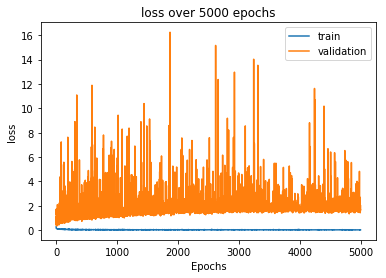

Average Training Score: 0.04057325756840892
Average Validation Score: 1.8467195714988747


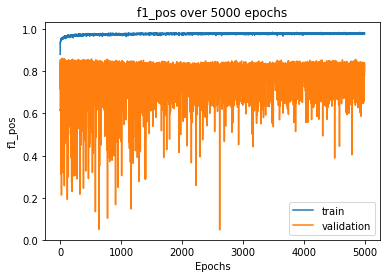

Average Training Score: 0.9757865485398581
Average Validation Score: 0.7696192022681042


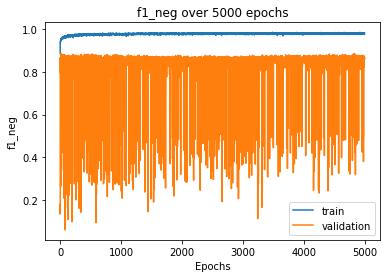

Average Training Score: 0.9767533976180128
Average Validation Score: 0.8198190921921686



In [4]:
from model_utils import create_model_architecture
from train_utils import train

use_gpu = True
device_name = 'cuda' if use_gpu else 'cpu'
print('device_name', device_name)

batch_size = 100

phases = ['train', 'val']
metric_types = ['loss', 'tn', 'fp', 'fn', 'tp', 'f1_pos', 'f1_neg']
metric_types_plot = ['loss', 'f1_pos', 'f1_neg']
metric_names_all = [p+'-'+m for p in phases for m in metric_types]
metric_names_plot = [p+'-'+m for p in phases for m in metric_types_plot]

all_metrics = {metric : [] for metric in metric_names_all}

num_training_epochs = 5000

data_loaders = {t : torch.utils.data.DataLoader(imagefolders[t], batch_size = batch_size, shuffle = True, num_workers = 4)
                for t in phases}

model = create_model_architecture('net1', use_gpu = use_gpu)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trained_model, train_metrics = train(model,
                                     criterion,
                                     optimizer,
                                     data_loaders['train'],
                                     data_loaders['val'],
                                     num_epochs=num_training_epochs,
                                     use_gpu = use_gpu)

all_metrics = train_metrics

for metric in metric_types_plot:
    plot_values(all_metrics['train-' + str(metric)],
               all_metrics['val-' + str(metric)],
               str(metric) + " over " + str(num_training_epochs) + " epochs",
               ylabel = str(metric))

# write metrics to file
# write_metrics_to_csv(all_metrics, metric_names_all, 'net1-IAM-aa_64-raw_logs', 'all_metrics.csv')

print()


In [5]:
# write metrics to file
write_metrics_to_csv(all_metrics, metric_names_all, 'net1-aa_64-5000ep-raw_logs', 'all_metrics.csv')
torch.save(trained_model.state_dict(), 'models/net1-aa_64-5000ep.pt')

Wrote metrics to 'net1-aa_64-5000ep-raw_logs/all_metrics.csv'


In [6]:

# import sys
# import os
# sys.path.append(os.path.abspath('../../../'))
# from detection.lib.model.ImageROI import ImageROI
# from PIL import Image

# # book_data_dir = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images'
# # img_loc = book_data_dir + '/Dryden/positive/307.png'
# # Testing with image of dimensions 1000x1381

# img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'
# pilimg = Image.open(img_loc)
# w, h = pilimg.size
# imgrois = [ImageROI(0, 0, w, h)]
# imgarr = np.asarray(pilimg)

# from bounding_box_classification import get_pos_rois
# # net1 = Net1()

# # Modify this as necessary
# # imgrois = [ImageROI(0, 0, 1000, 700), ImageROI(0, 750, 1000, 500)]
# trained_model.train(False)
# with torch.set_grad_enabled(False):
#     pos_rois = get_pos_rois(trained_model,
#                             (pilimg, imgrois),
#                             model_transform = net1_data_transforms['test'],
#                             model_input_size = (64,64),
#                             stride=(32, 32))

# for rois in pos_rois:
#     for roi in rois:
#         print(roi.toString())
        
# all_rois = [roi for rois in pos_rois for roi in rois]
    
# print('number of pos ROIs found', len(all_rois))

# from detection.lib.ImgProcessor import ImgProcessor
# from detection.lib.utils.Utils import plt_img
# # plot the rois and plot only certain information according to the set
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=img_loc)
# roi_level_set = set([1])
# plt_img(imgarr, rois=all_rois, roi_level_set=roi_level_set)

In [7]:

# import sys
# import os.path
# sys.path.append(os.path.abspath('../../../'))


# # from detection.lib.ImgProcessor import ImgProcessor
# import matplotlib.pyplot as plt
# import numpy as np
# from detection.lib.utils.Utils import *
# from detection.lib.OCREngine import OCREngine
# import pickle

# from PIL import Image

# # 1. parameters
# # root_dir = './sample'
# # img_id = '639'
# # fname = '%s.png' %img_id
# # ocr_engine = 'cv2'
# # f = '%s/%s' % (root_dir,fname)

# ocr_engine = 'tesseract'
# img_id = '1307'
# fname = '1307.png'
# f = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'

# # 2. Load the image
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=f)
# img = np.asarray(Image.open(f))

# # 3. preprocess the image
# # img = imgProcessor.quickPreprocess(img)

# # 4. load the image ground truth
# # img_roi_ground_truth = all_ground_truth[img_id]

# # 5. define the OCR
# # define engine
# ocr = OCREngine(ocr_engine)
# img_roi_ocr, data_df = ocr.image_to_data(img)

# # plot the rois and plot only certain information according to the set
# # roi_level_set = set([2])
# # rois = [(img_roi_ground_truth,'b'), (img_roi_ocr,'r')]
# rois = [(img_roi_ocr,'r')]
# plt_img(img, rois=rois)#, roi_level_set=roi_level_set)

# # save the plot
# plt.savefig('./result/%s_%s_boxes.png' %(fname,ocr_engine))

# # save the bounding boxes to txt
# # save_rois(img_roi_ground_truth,'./result/%s_imgROIs_ground_truth.txt' %fname)
# save_rois(img_roi_ocr,'./result/%s_imgROIs.txt' %fname)

# # save the bounding boxes to pickle
# # with open('./result/%s_imgROIs.pkl' %fname,'wb') as f:
# #     pickle.dump({'ocr':img_roi_ocr, 'ground_truth':img_roi_ground_truth},f)

